In [36]:
import pandas 
from scipy.optimize import curve_fit
import numpy as np 

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt 
plt.style.use( 'ggplot' ) 

# BglB kinetic data and thermal stability data statistical analysis 

## Kinetics 

In [38]:
# see notebook in raw/ for data preprocessing 
df = pandas.read_csv( 'clean/kinetics.csv' ) 
df = df[ ( df.kobs > 0 ) ] 

print( len( df.mutant.unique() ), 'unique names' ) 
print( df.columns ) 

31 unique names
Index(['Unnamed: 0', 'well', 'rate', 'mutant', 'protein_yield', 'dilution',
       'note', 'kobs', 's'],
      dtype='object')


In [39]:
p0=(3,1)
null = np.array( [ np.nan for i in range( len( p0 ) ) ] )
null

array([ nan,  nan])

In [40]:
def my_curve_fit( f, xdata, ydata, p0 ):
    null_return = ( [ np.nan, np.nan ], [ np.nan, np.nan ] )
    try:
        curve_return = curve_fit( f, xdata, ydata, p0 )
        if len( curve_return ) == 2:
            errors = np.sqrt( np.diag( curve_return[1] ) ) 
            return curve_return[0], errors 
        else:
            return null_return
    except:
        return null_return

In [41]:
def v( s, kcat, km ):
    return ( kcat * s ) / ( km + s )

In [42]:
for idx, data in df.groupby( 'mutant' ):
    if len( data ) != 24:
        print( idx, 'ain\'t got no ({} data points)'.format( len( data ) ) )

E164G ain't got no (17 data points)
E164R ain't got no (14 data points)
F415N ain't got no (21 data points)
H178R ain't got no (16 data points)
H379T ain't got no (22 data points)
L362M ain't got no (21 data points)
M221A_2 ain't got no (23 data points)
N220G ain't got no (21 data points)
N220R ain't got no (21 data points)
N220Y ain't got no (21 data points)
N293C ain't got no (21 data points)
N293D ain't got no (16 data points)
N354A_2 ain't got no (23 data points)
N404C ain't got no (22 data points)
R240E ain't got no (11 data points)
S16N ain't got no (17 data points)
T15A ain't got no (21 data points)
T296A_2 ain't got no (21 data points)
W325G ain't got no (15 data points)
W325R ain't got no (23 data points)
W399R ain't got no (20 data points)
W409Y ain't got no (23 data points)
WT ain't got no (21 data points)
Y166P_2 ain't got no (21 data points)


In [43]:
my_mutants = pandas.DataFrame( columns=[ 'kcat', 'km', 'kcat_std_err', 'km_std_err' ] ) 
for idx, data in df.groupby( 'mutant' ):
    params, std_err = my_curve_fit( v, data.s, data.kobs, ( data.kobs.max(), .1 ) )
    my_mutants.loc[ idx ] = np.append( params, std_err )

In [44]:
good_fits = pandas.DataFrame( columns=[ 'kcat', 'km', 'kcat_std_err', 'km_std_err' ] )
for idx, data in my_mutants.iterrows():
    if data.kcat > data.kcat_std_err and data.km > data.km_std_err:
        good_fits.loc[ idx ] = data 
    else:
        good_fits.loc[ idx ] = ( np.nan, np.nan, np.nan, np.nan )
        
good_fits

,kcat,km,kcat_std_err,km_std_err
E164G,NaN,NaN,NaN,NaN
E164R,2.012457,2.297194,1.473588,2.180306
E222K_2,NaN,NaN,NaN,NaN
E222R_2,NaN,NaN,NaN,NaN
E222Y_2,NaN,NaN,NaN,NaN
F415N,0.893262,0.230694,0.028304,0.019439
H178A_2,12.223963,0.111321,0.253224,0.007476
H178R,4.281330,3.391919,3.303600,3.151370
H379T,5.169198,0.057735,0.122314,0.005111
I244N_2,732.474536,0.048966,8.985407,0.002319


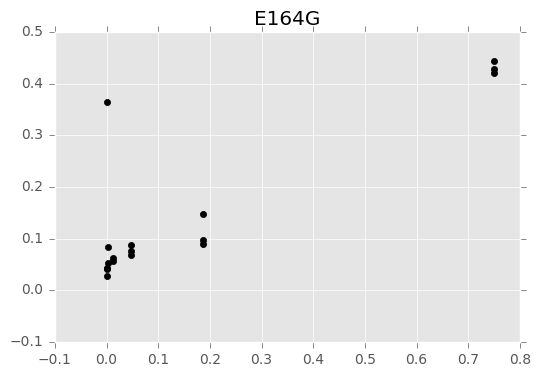

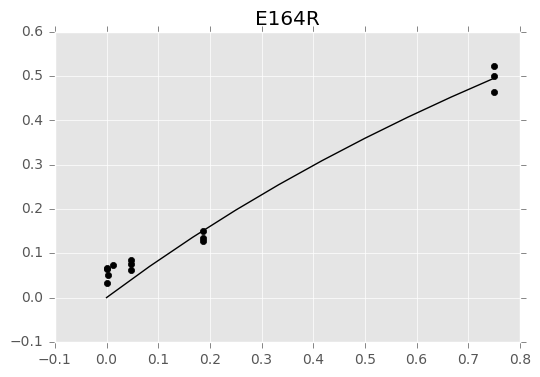

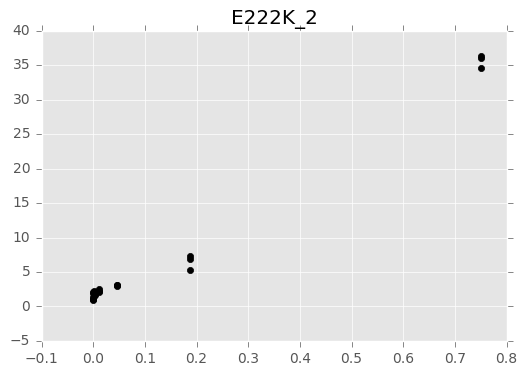

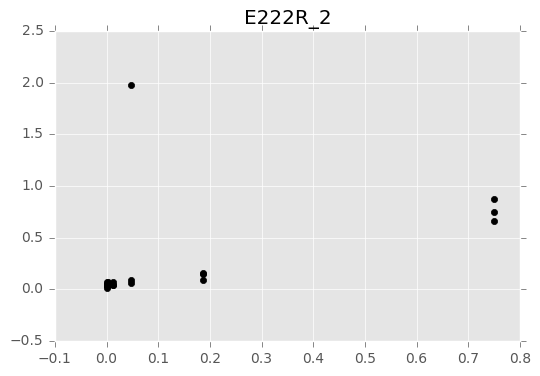

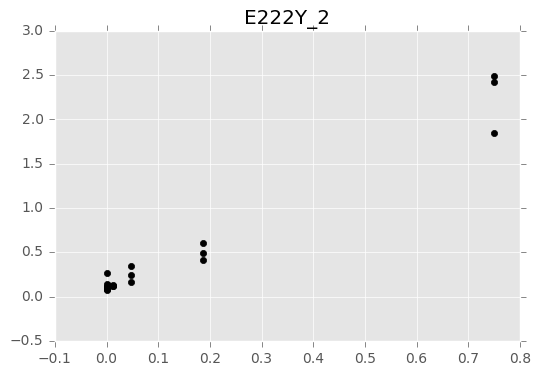

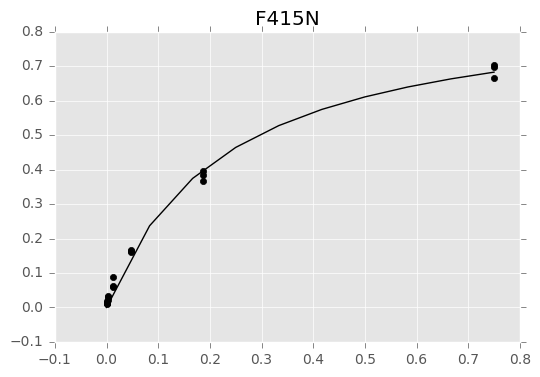

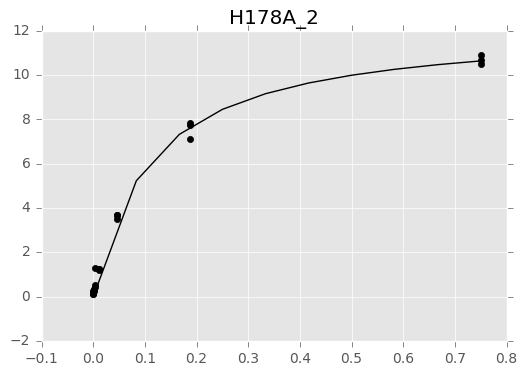

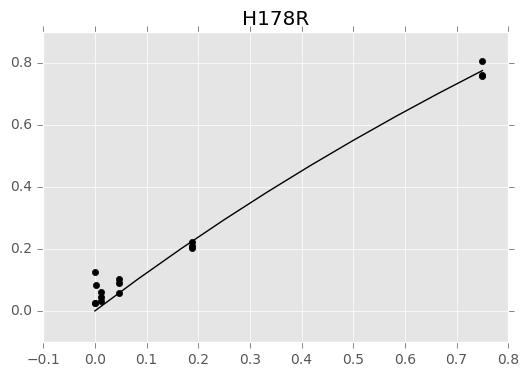

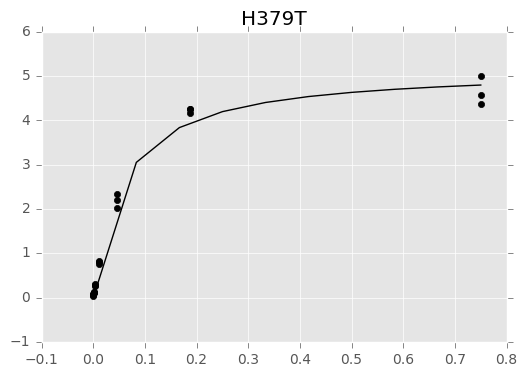

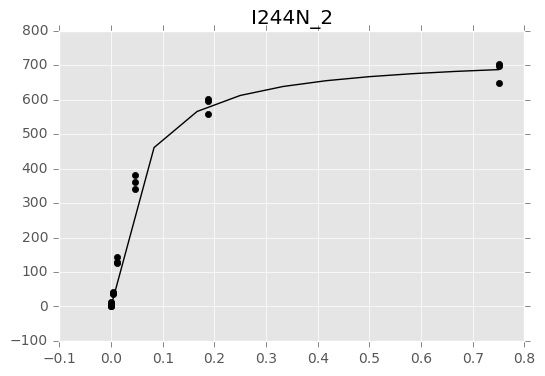

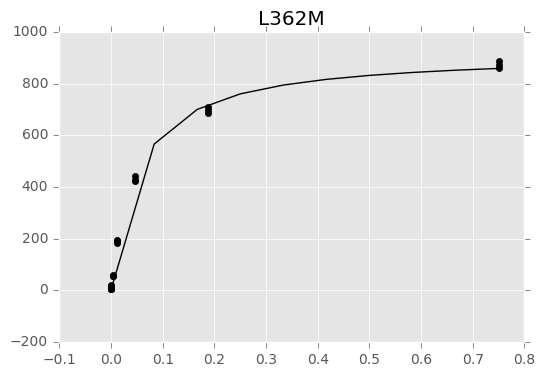

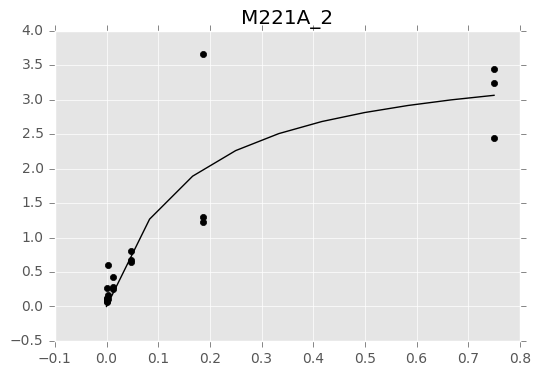

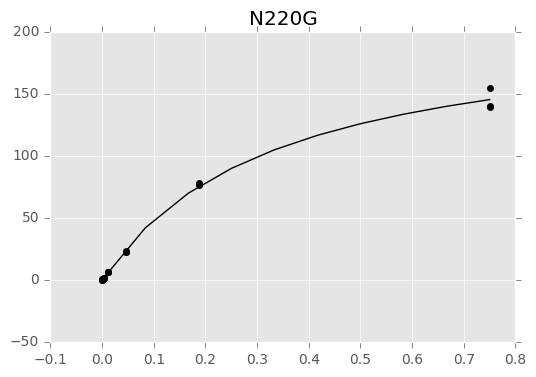

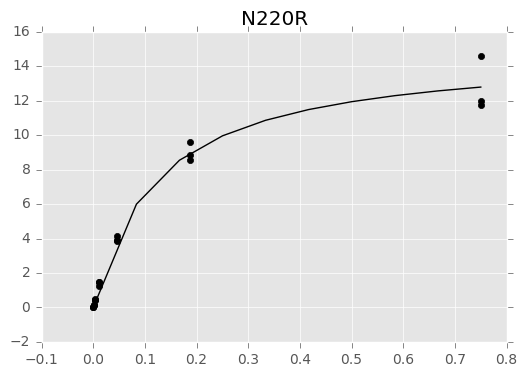

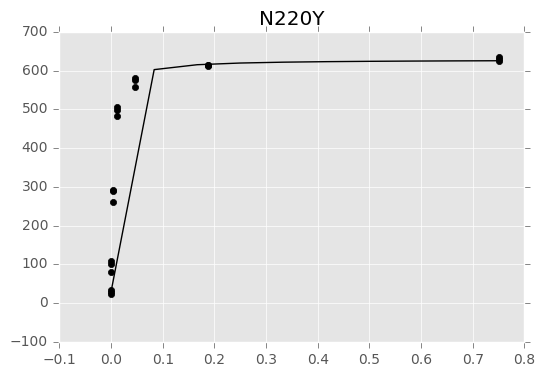

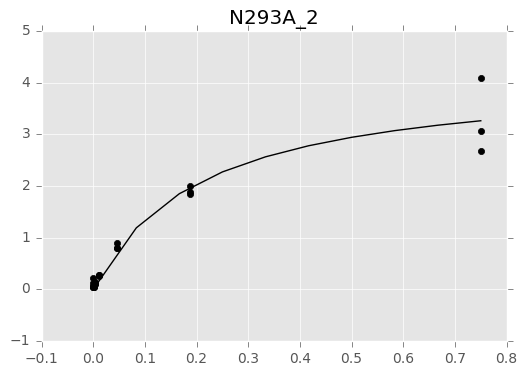

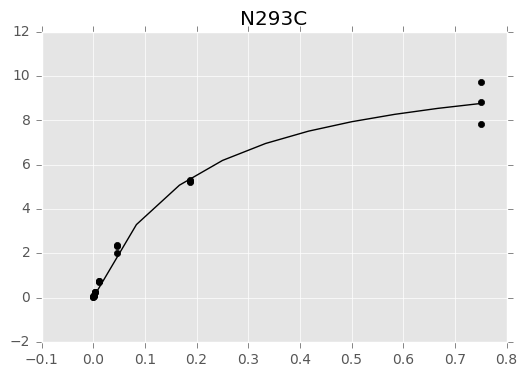

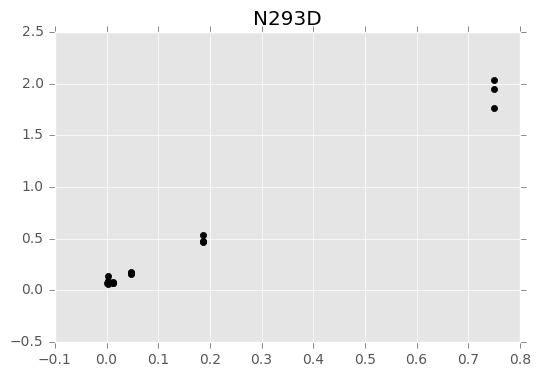

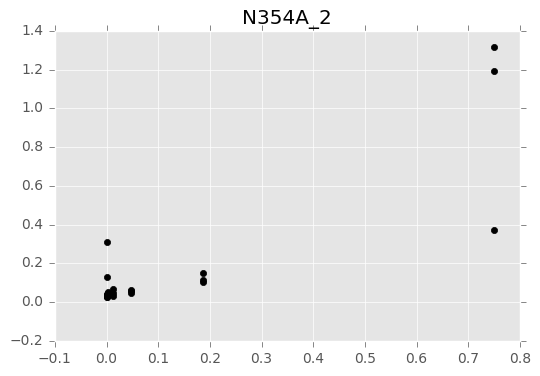

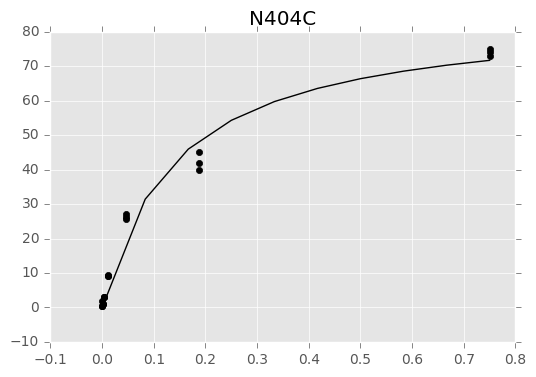

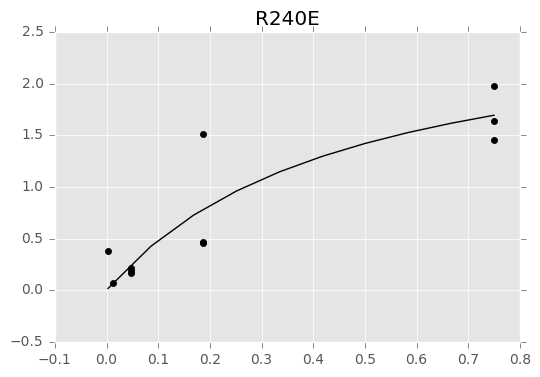

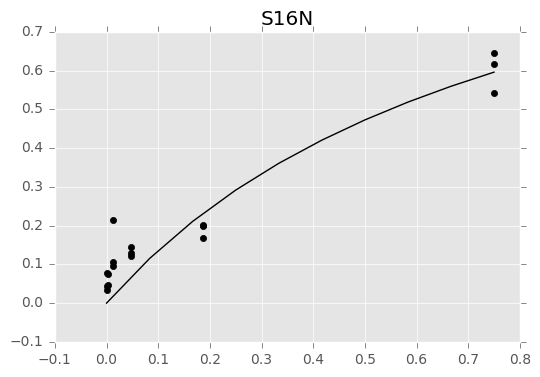

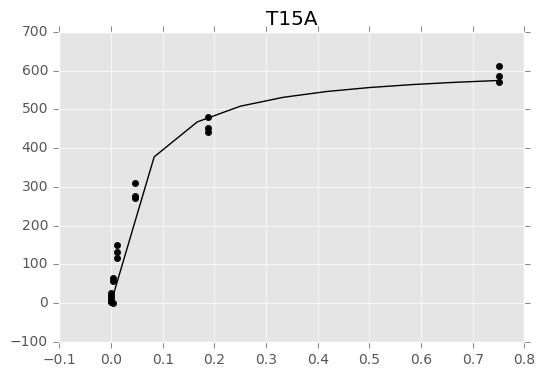

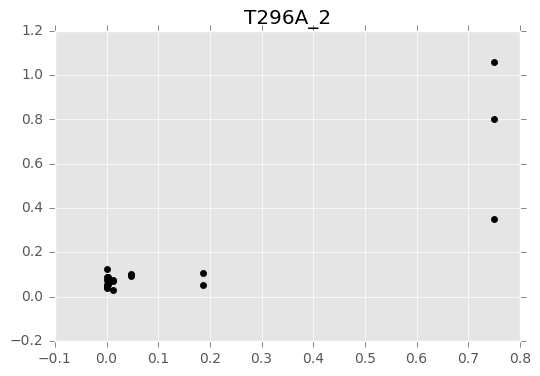

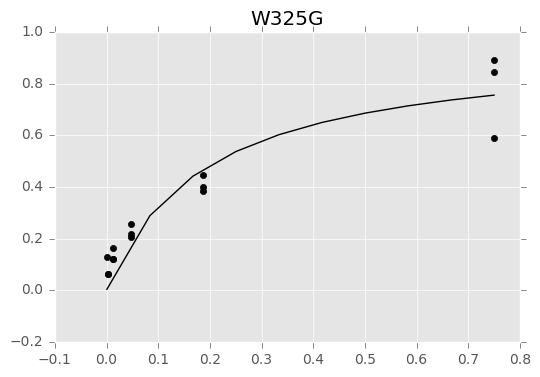

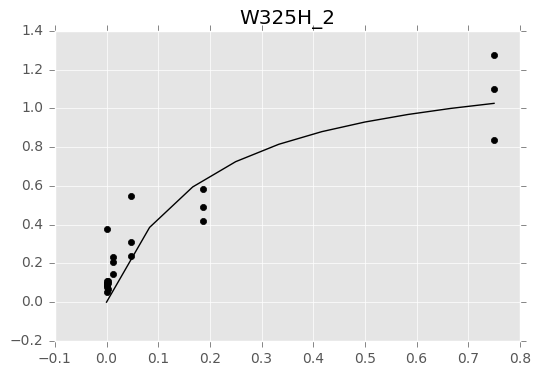

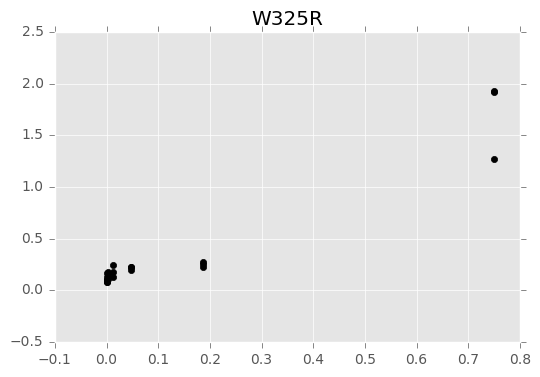

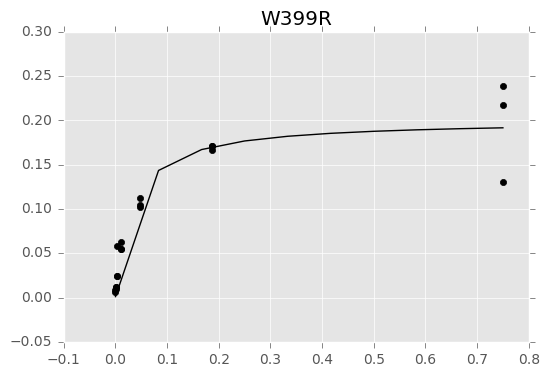

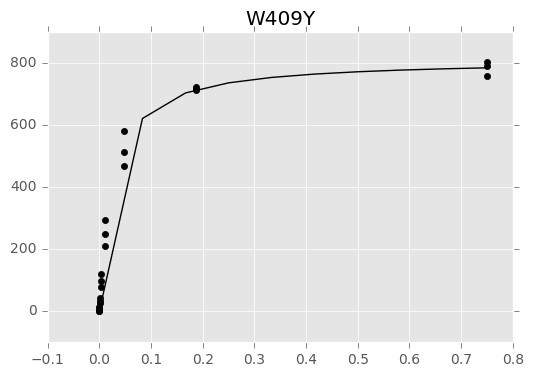

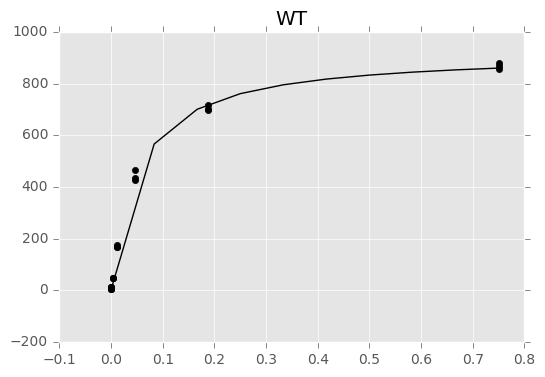

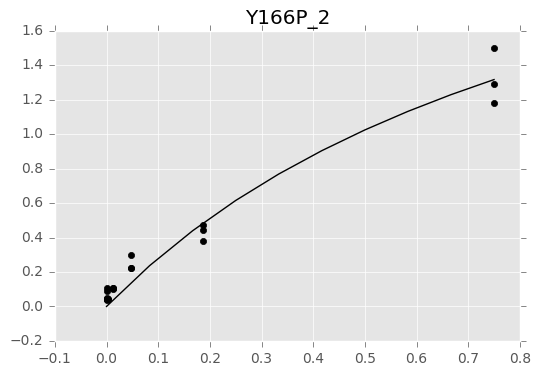

In [45]:
for i, (idx, data) in enumerate( df.groupby( 'mutant' ) ):
    plt.scatter( data.s, data.kobs, color='k' )
    x_vals = np.linspace( data.s.min(), data.s.max(), 10 )
    my_params = good_fits.loc[ idx ][ 0 : 2 ] 
    if any( my_params ):
        plt.plot( x_vals, v( x_vals, *my_params ), color='k' ) 
    plt.title( idx ) 
    plt.show()

# Thermal stability 

In [46]:
df = pandas.read_csv( 'clean/thermal.csv' ) 
df = df[ ( df.rate > 0 ) ]

print( len( df.mutant.unique() ), 'unique names' ) 
print( df.columns ) 

152 unique names
Index(['Unnamed: 0', 'well', 'rate', 'mutant', 'temp'], dtype='object')


In [47]:
def r( x, x0, k ): 
    return 1 / ( 1 + np.exp( -k * ( x - x0 ) ) )

In [48]:
my_thermal = pandas.DataFrame( columns=[ 'tm', 'k', 'tm_std_err', 'k_std_err' ] ) 
for idx, data in df.groupby( 'mutant' ):
    norm_rates = data[ 'rate' ] / data[ 'rate' ].max()
    params, cov = my_curve_fit( r, data.temp, norm_rates, ( 40, -1 ) )
    my_thermal.loc[ idx ] = np.append( params, cov ) 
    #print( np.append( params, cov ) ) 

/usr/local/bin/anaconda3/lib/python3.5/site-packages/scipy/optimize/minpack.py:715: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [49]:
good_thermal_fits = pandas.DataFrame( columns=[ 'tm', 'k', 'tm_std_err', 'k_std_err' ] )
for idx, data in my_thermal.iterrows():
    if 30 < data.tm < 50 and data.k < 0:
        good_thermal_fits.loc[ idx ] = data 
    else:
        good_thermal_fits.loc[ idx ] = ( np.nan, np.nan, np.nan, np.nan )
        
pandas.options.display.max_rows = 1000 
good_thermal_fits

,tm,k,tm_std_err,k_std_err
A195S,39.082872,-0.906737,0.341891,0.273713
BglB,39.859552,-1.145110,0.109541,0.088947
C167A,39.735604,-1.388449,0.552891,0.592386
C167Q,38.471592,-0.529363,0.192137,0.047938
D403A,NaN,NaN,NaN,NaN
E154D,38.699119,-0.688705,0.378855,0.167384
E164A,NaN,NaN,NaN,NaN
E164A_B,31.971970,-2.076694,0.461267,0.991790
E164A_C,45.994408,-0.374600,0.132617,0.017976
E164G,NaN,NaN,NaN,NaN


A195S


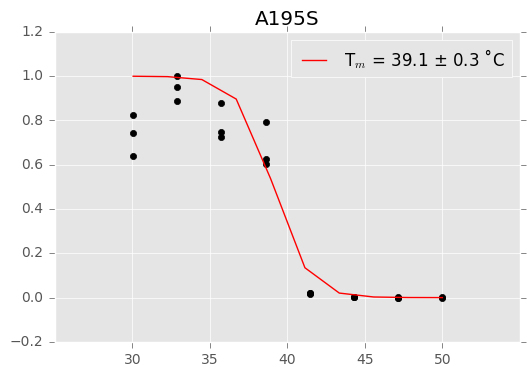

BglB


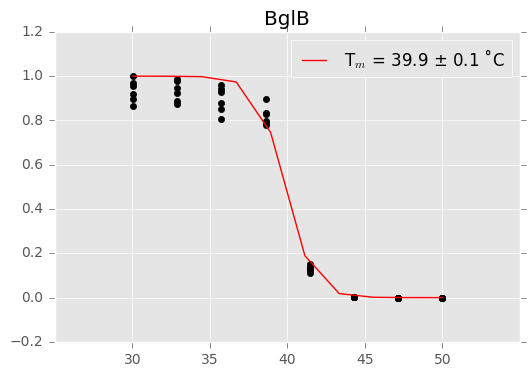

C167A


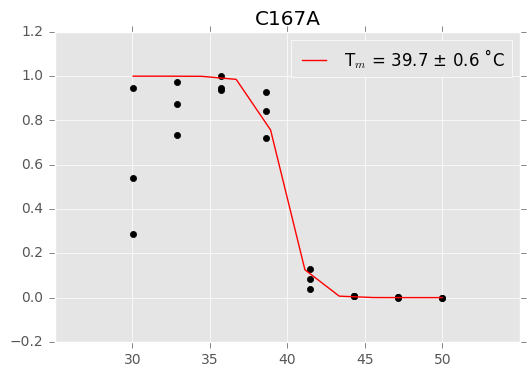

C167Q


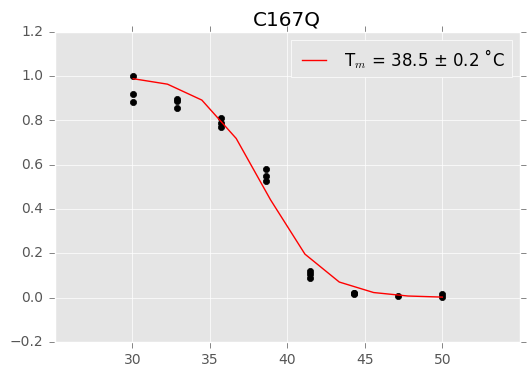

D403A


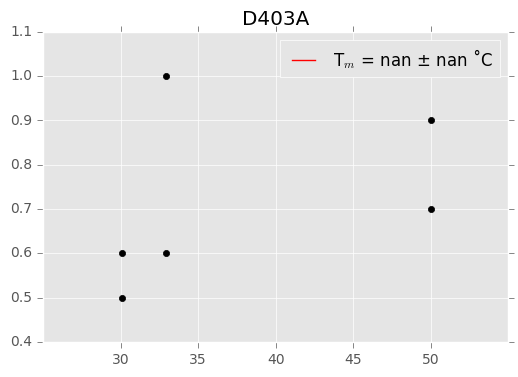

E154D


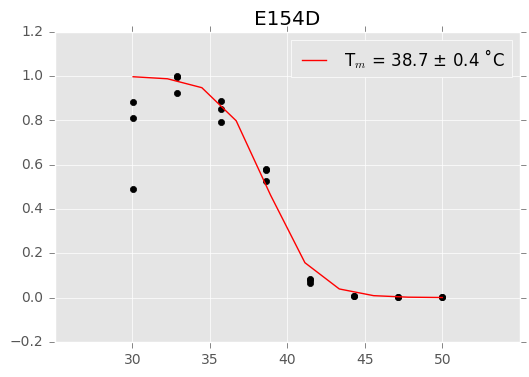

E164A


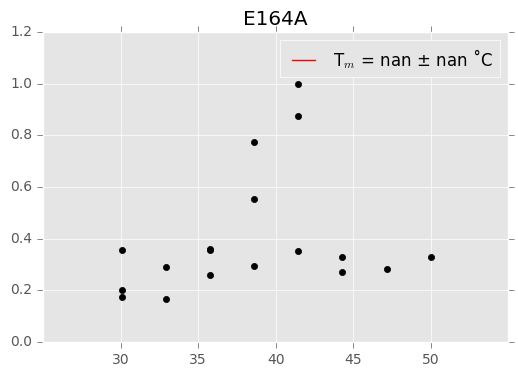

E164A_B


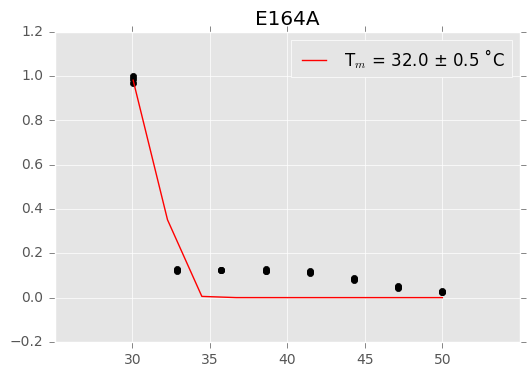

E164A_C


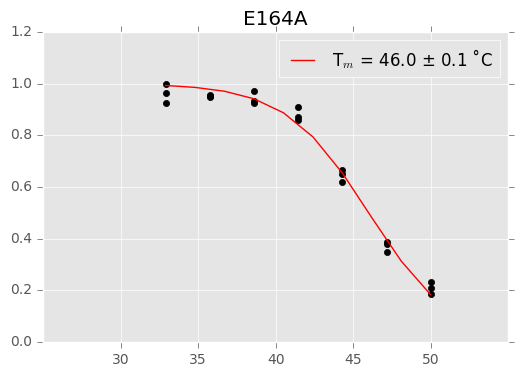

E164G


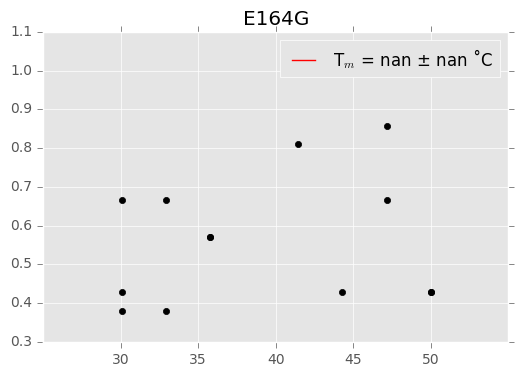

E164R


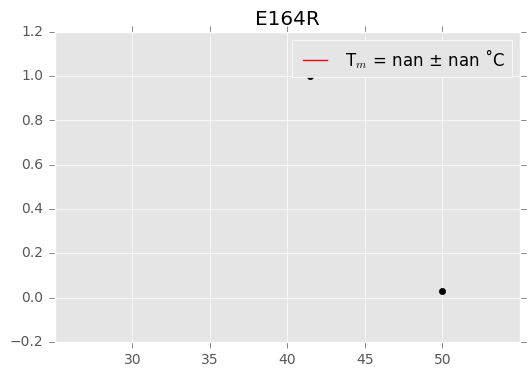

E177A


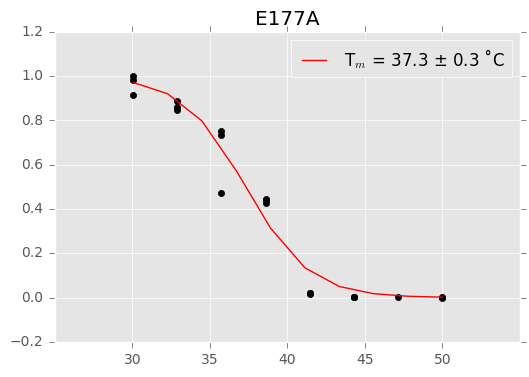

E180K


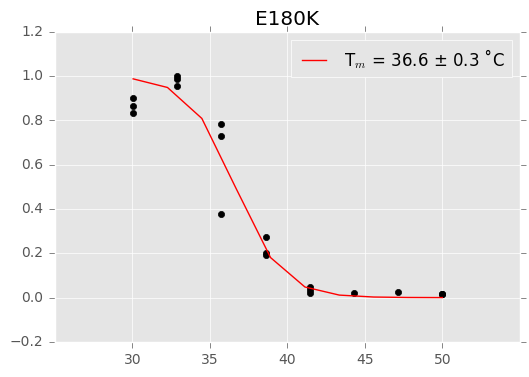

E180L


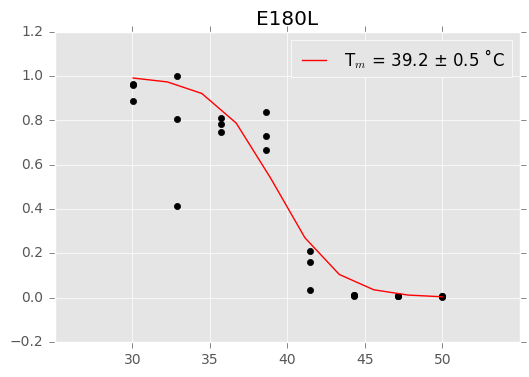

E222A


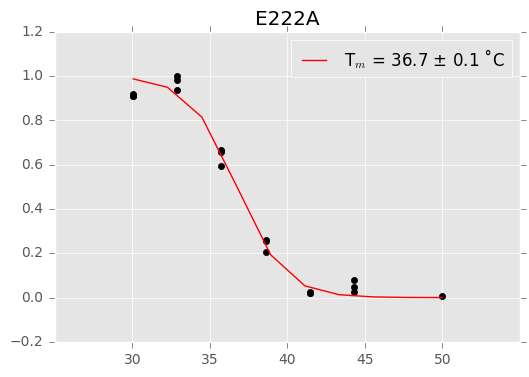

E222H


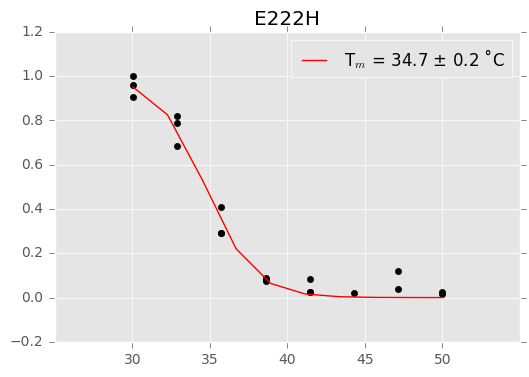

E222K


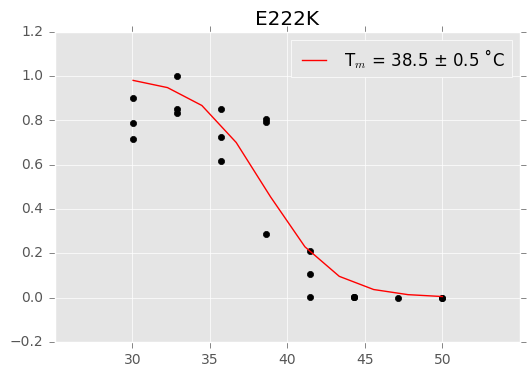

E222K_2


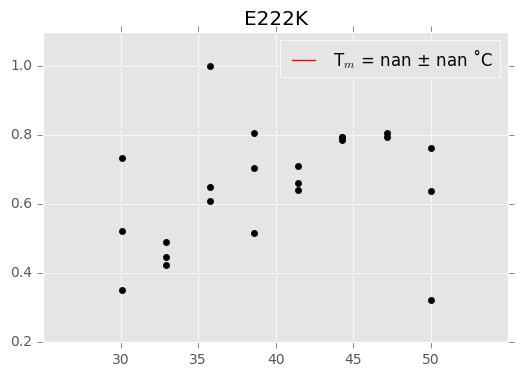

E222Q


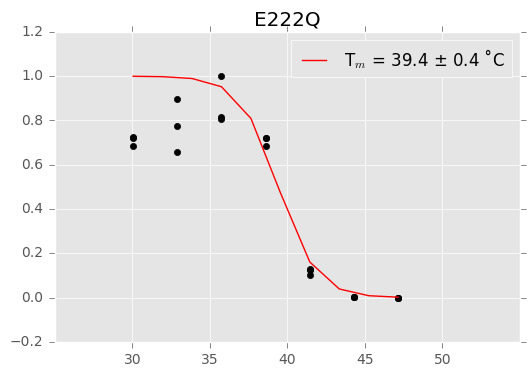

E222R


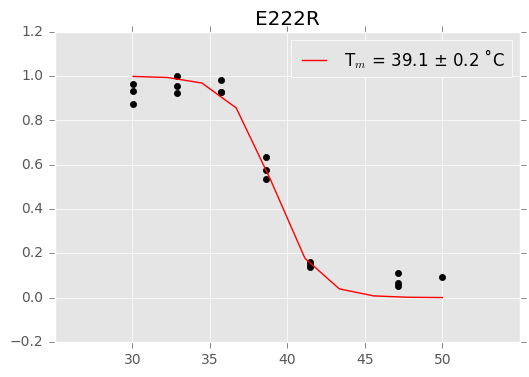

E222R_2


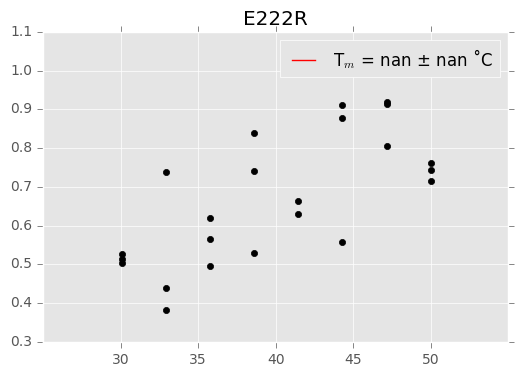

E222Y


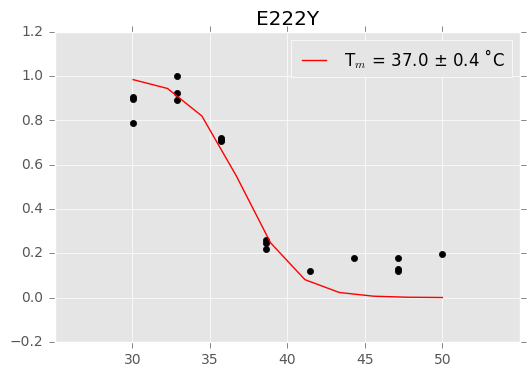

E22Y_2


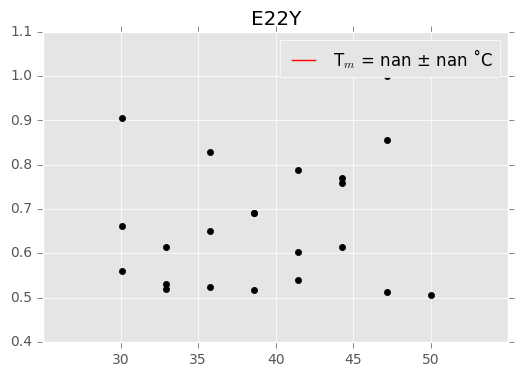

E353A


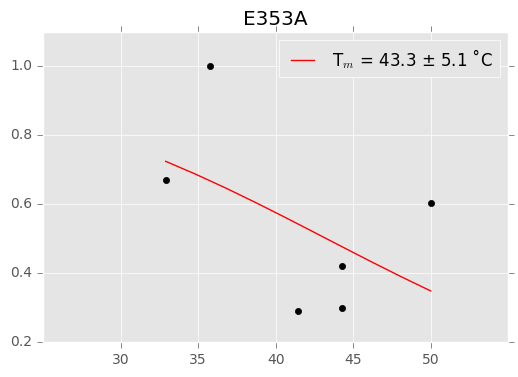

E406A


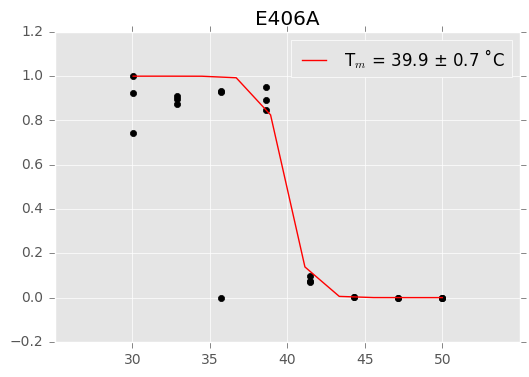

E406D


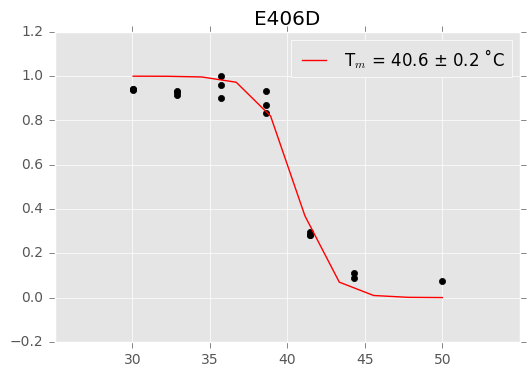

E426S


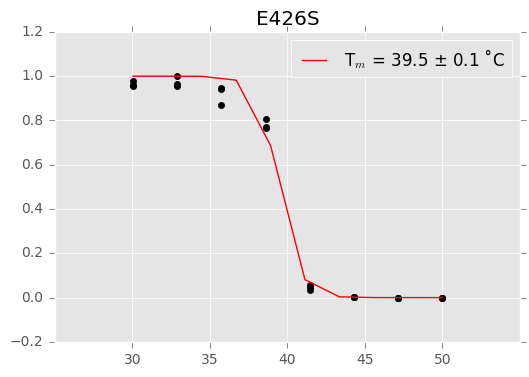

F415A


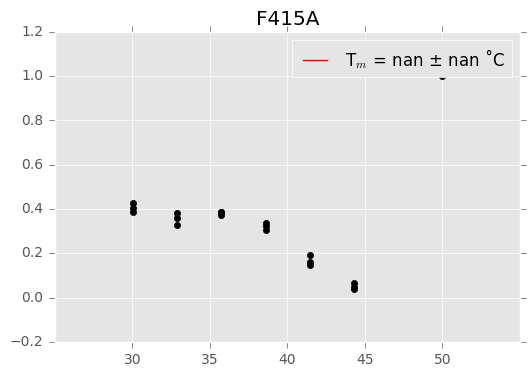

F415A_B


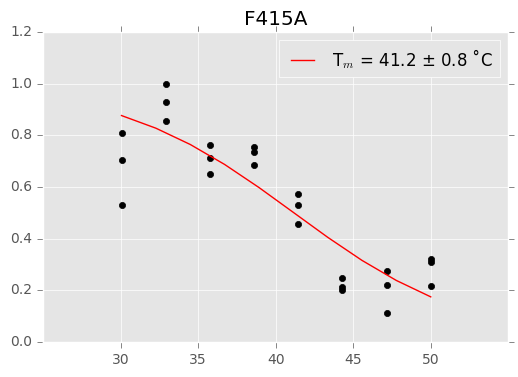

F415A_C


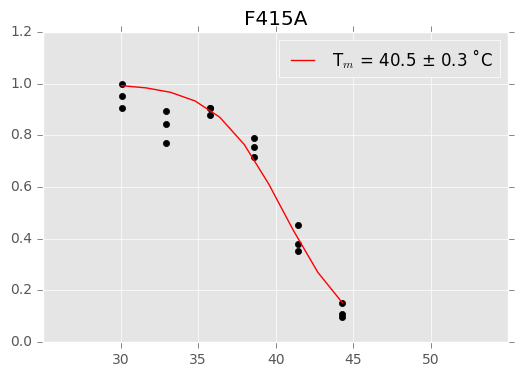

F415N


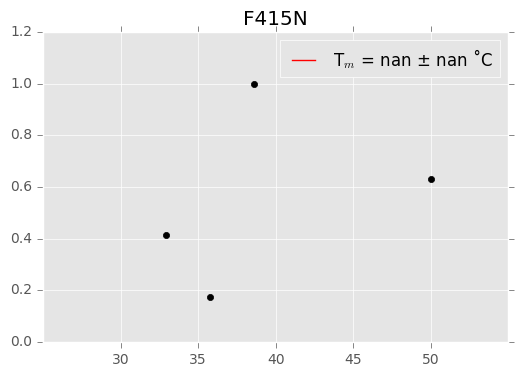

F415N_B


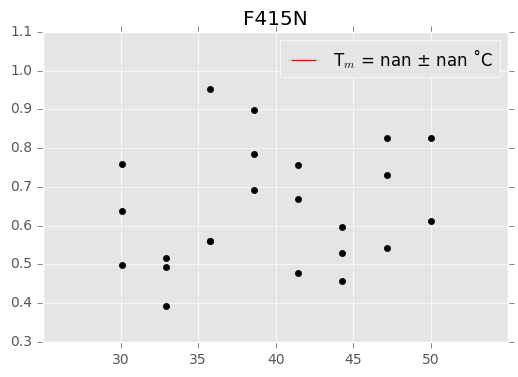

F75H


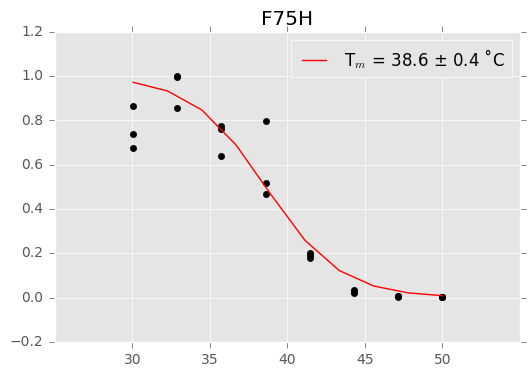

G355A


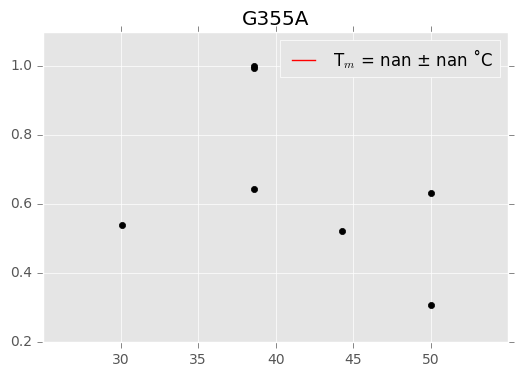

H101R


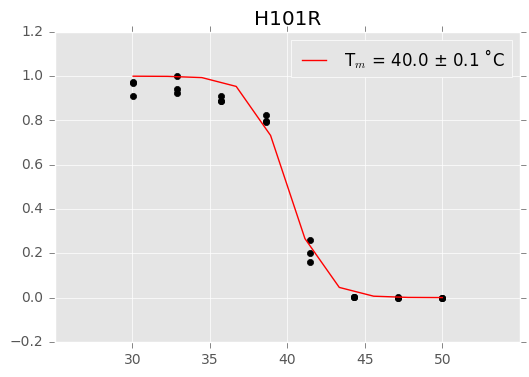

H119A


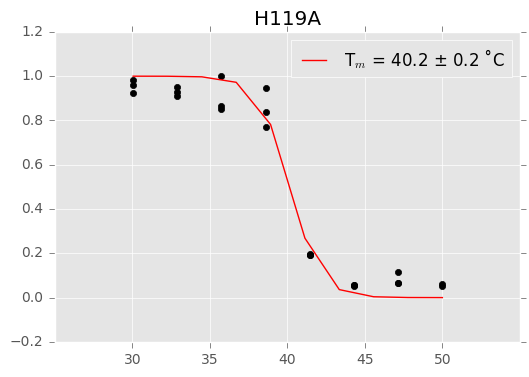

H119N_B


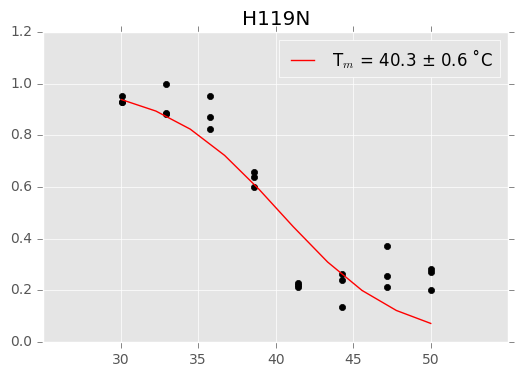

H122E


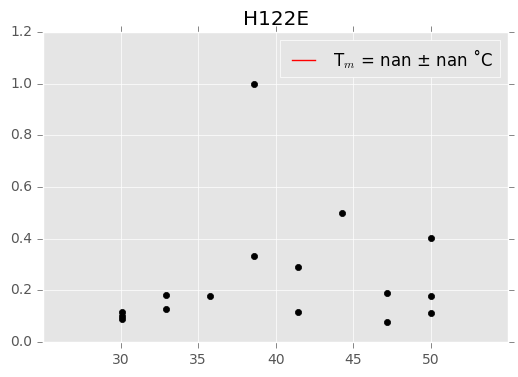

H122N


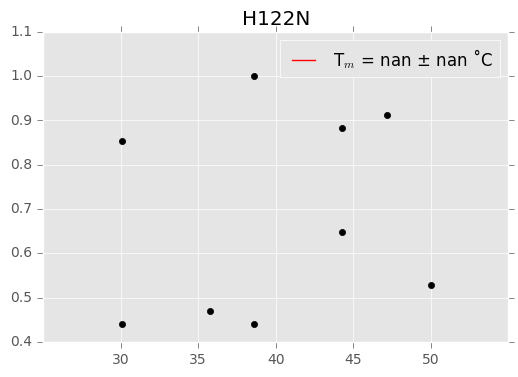

H178A


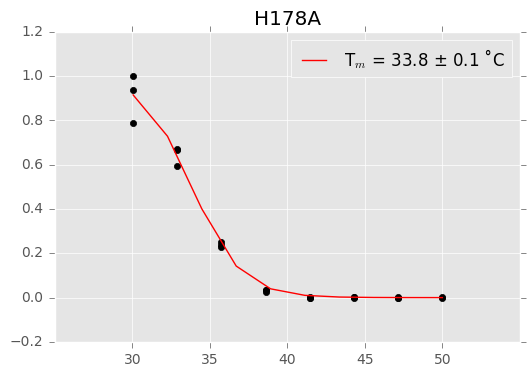

H178A_2


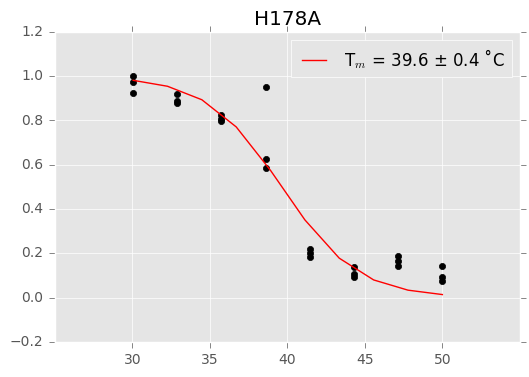

H178R


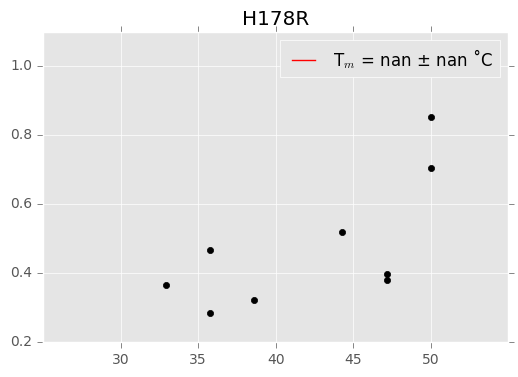

H315E


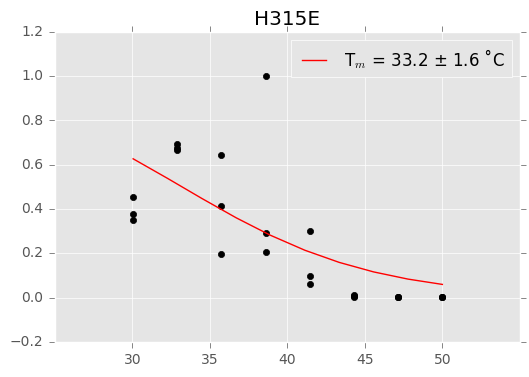

H315N


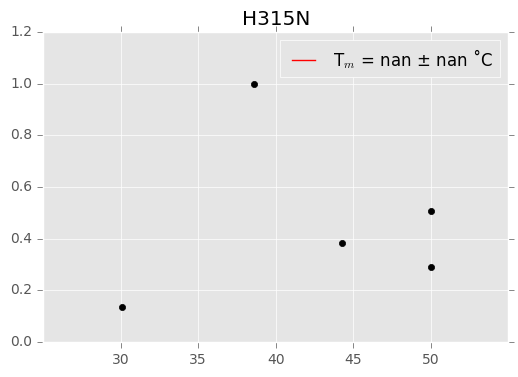

H373R


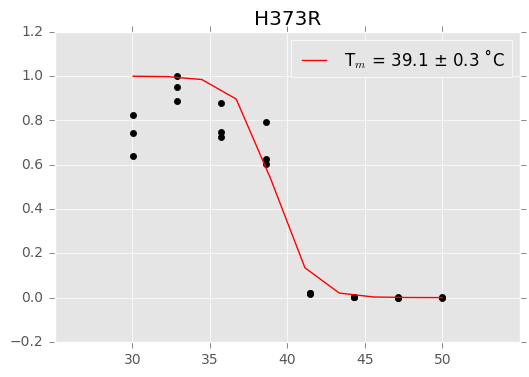

H379R


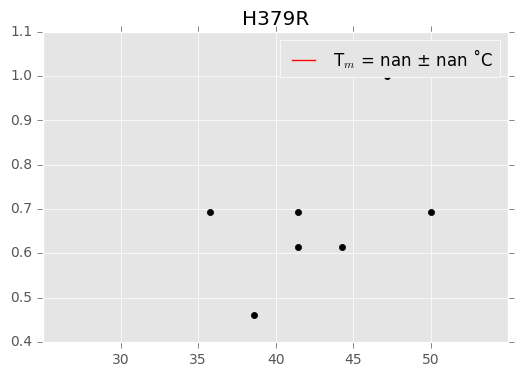

H379R_B


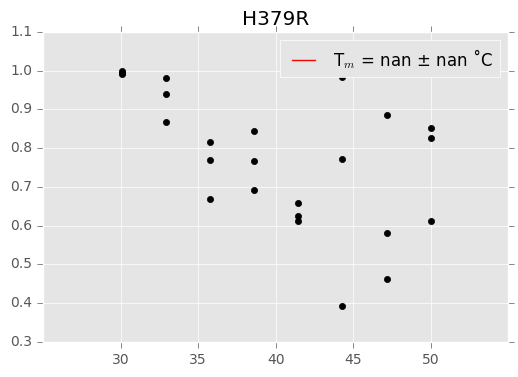

H379T


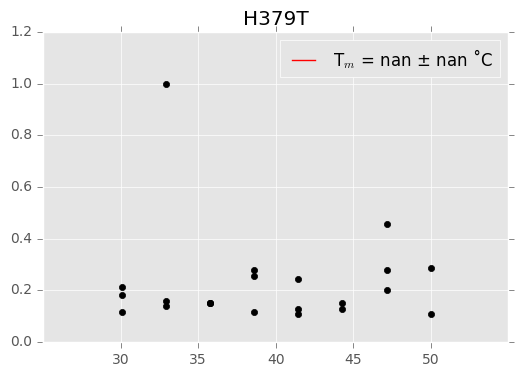

I244E


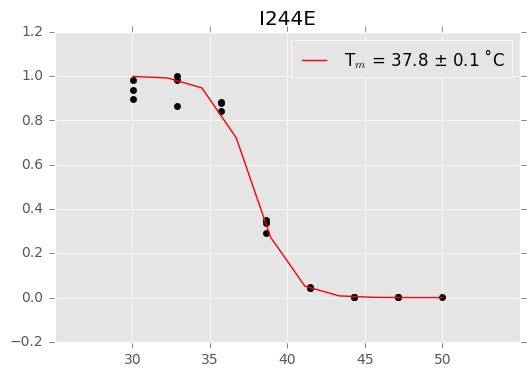

I244N_2


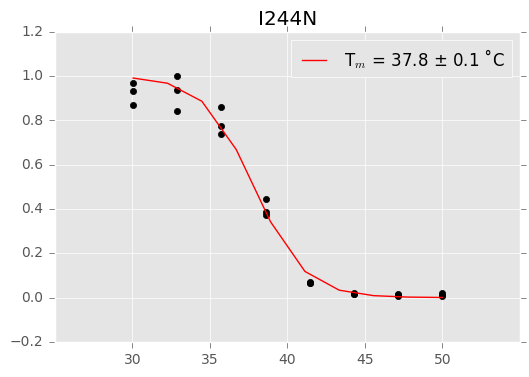

I247N


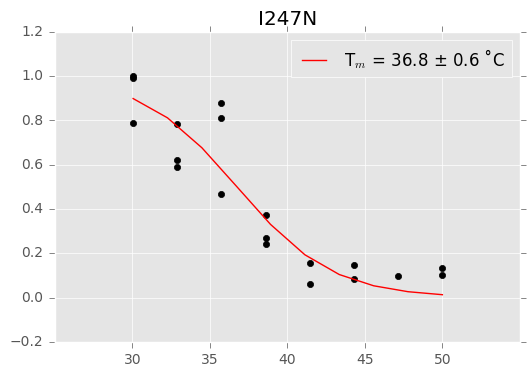

I303N


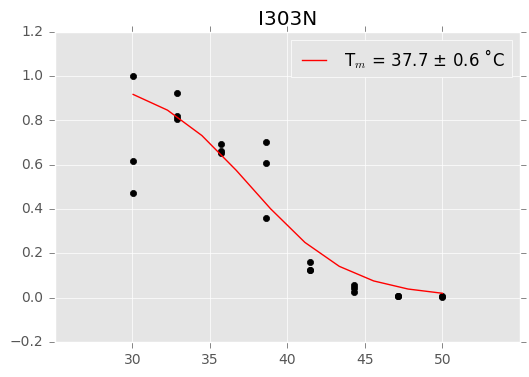

I91E


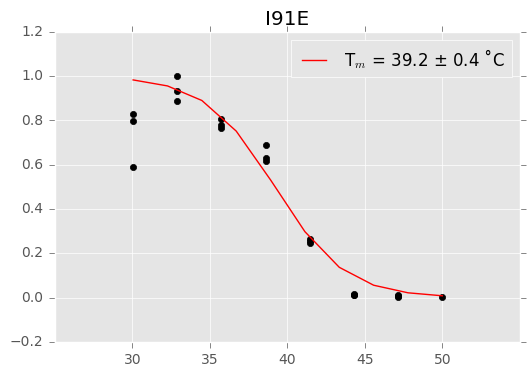

K344A


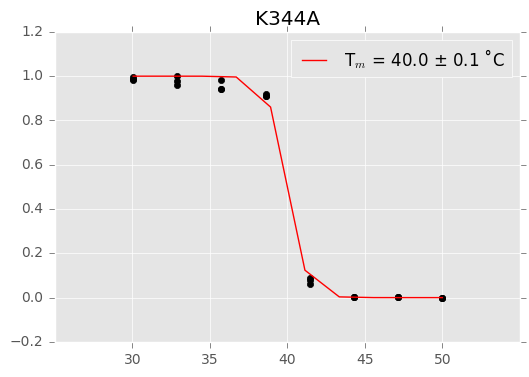

L171A


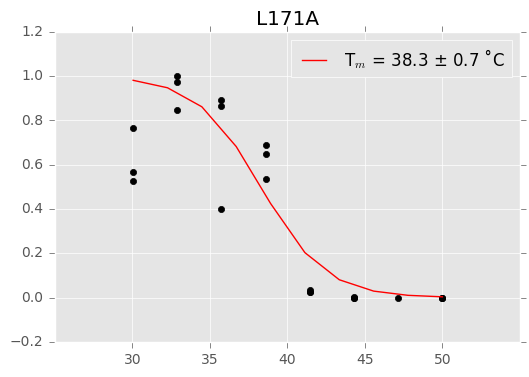

L174R


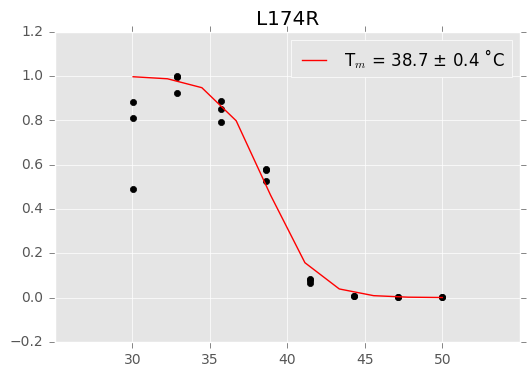

L362M


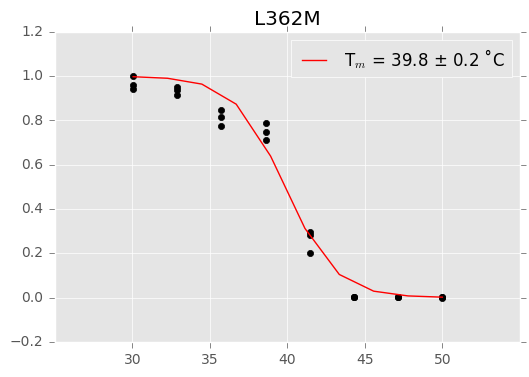

M221A


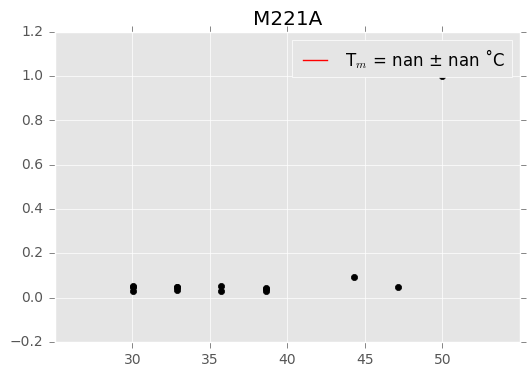

M221A_2


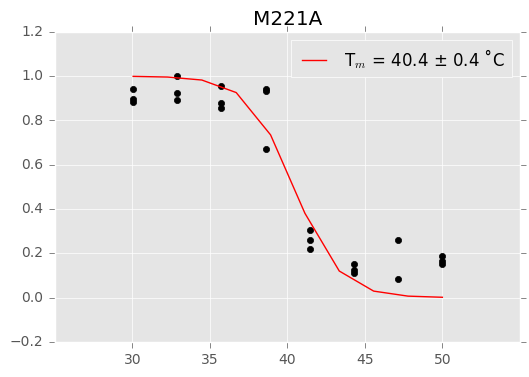

M261D


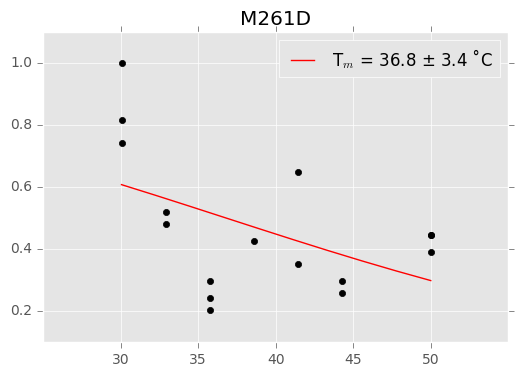

M323A


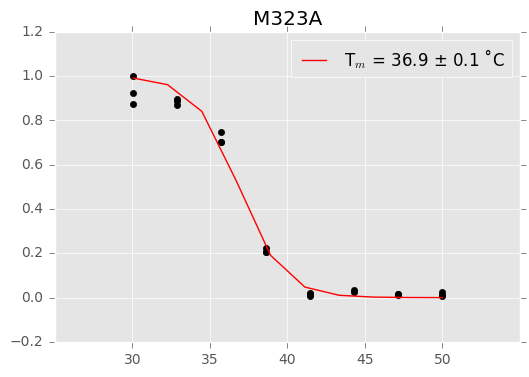

M323K


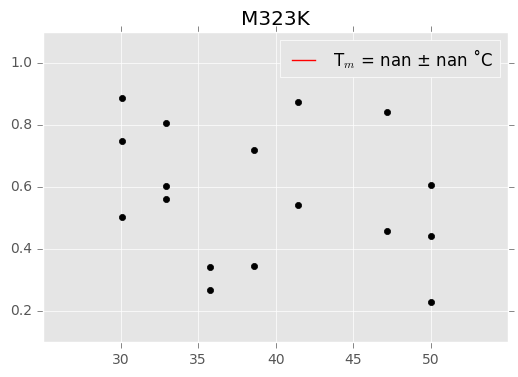

M361T


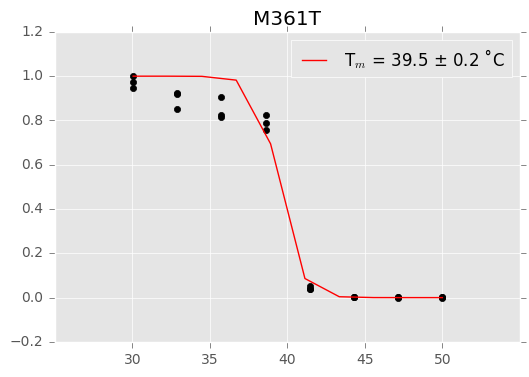

N163A


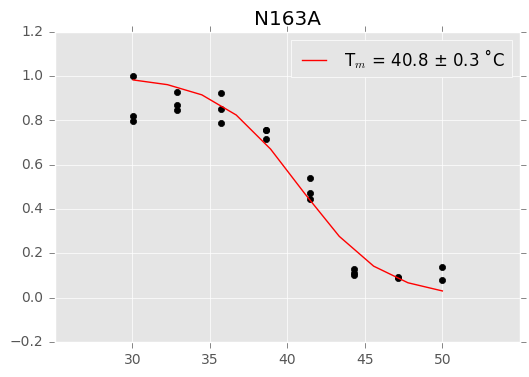

N163C


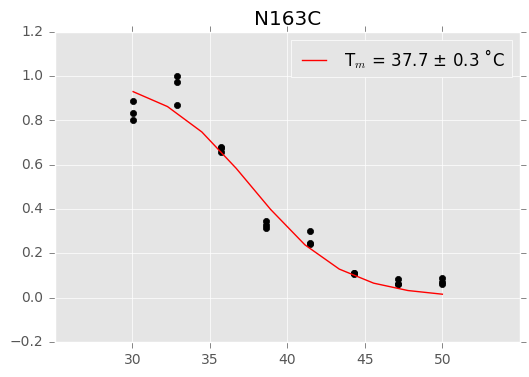

N163D


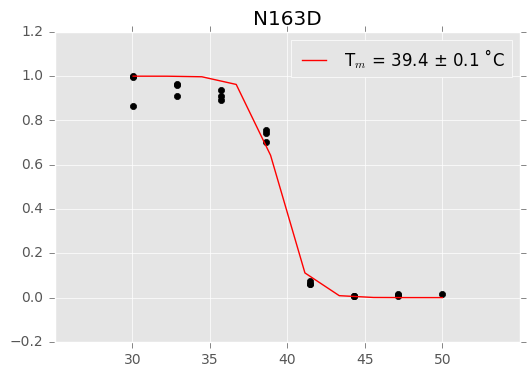

N166D


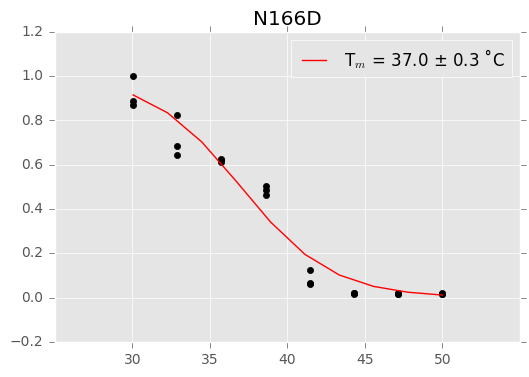

N220A


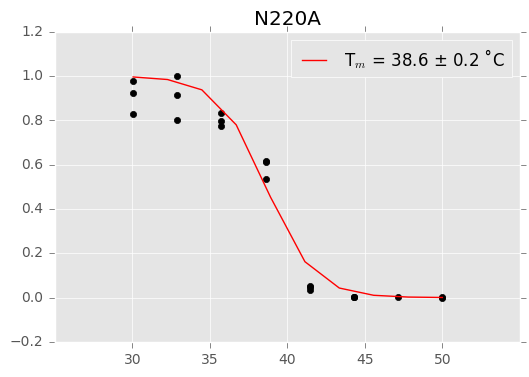

N220R


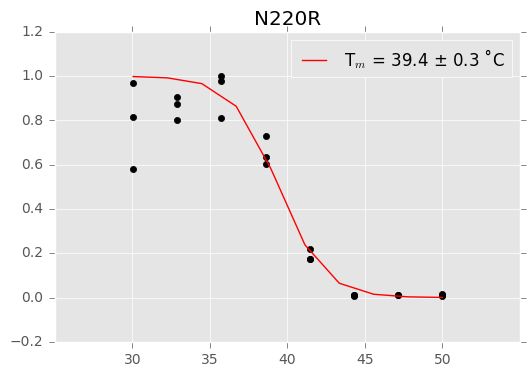

N220Y


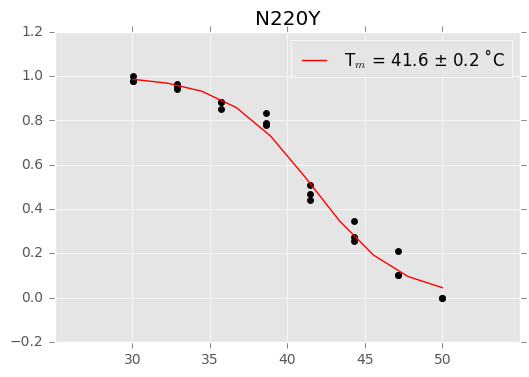

N223G


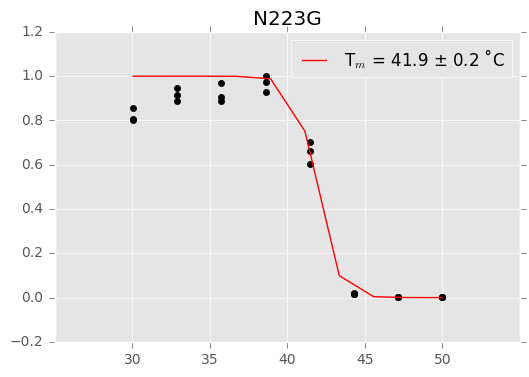

N223H


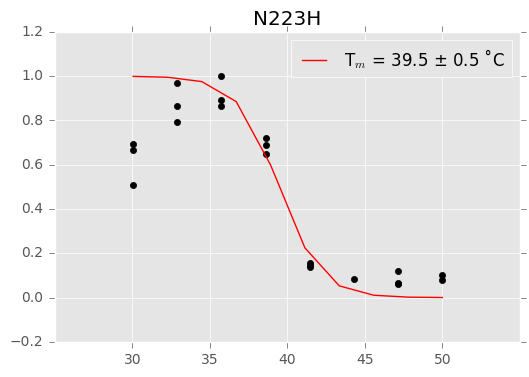

N293A


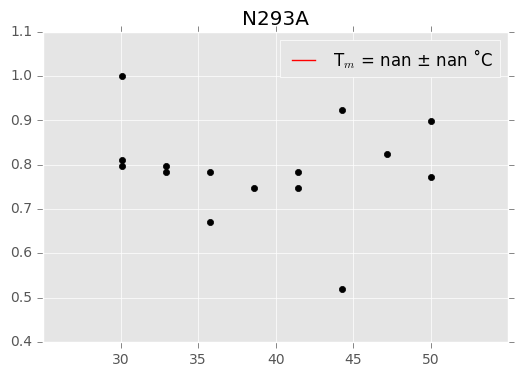

N293A_2


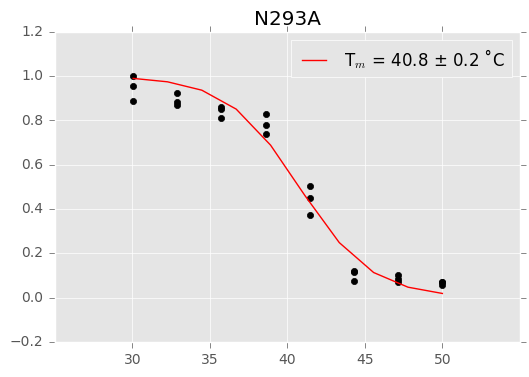

N293C


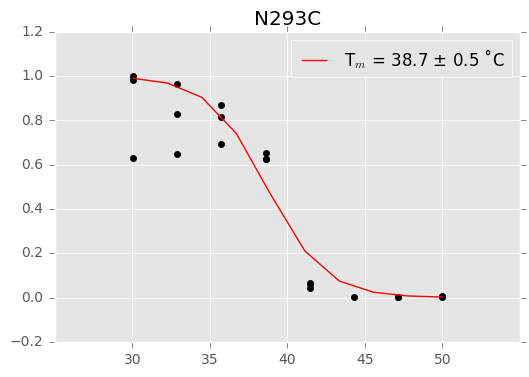

N293D


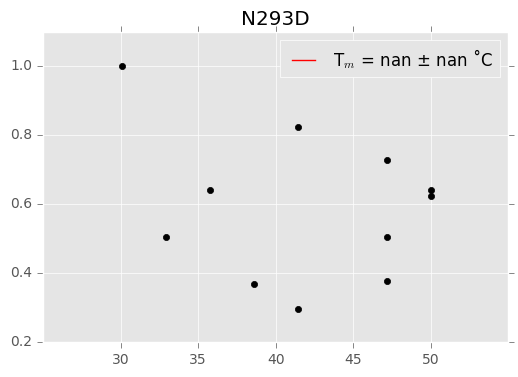

N293Q


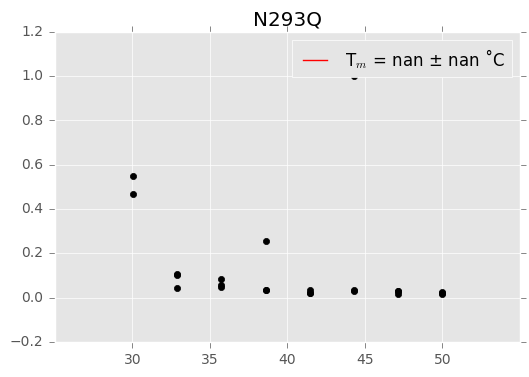

N354A


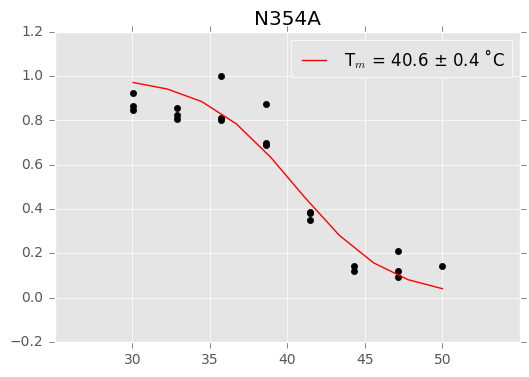

N354A_2


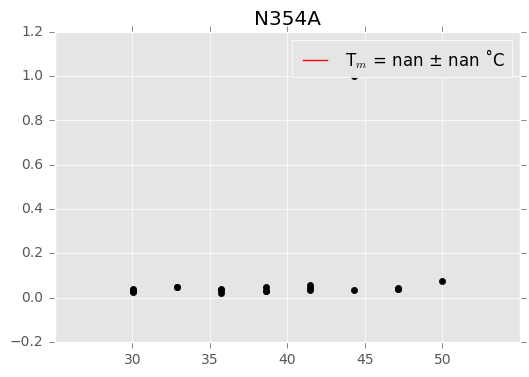

N404A


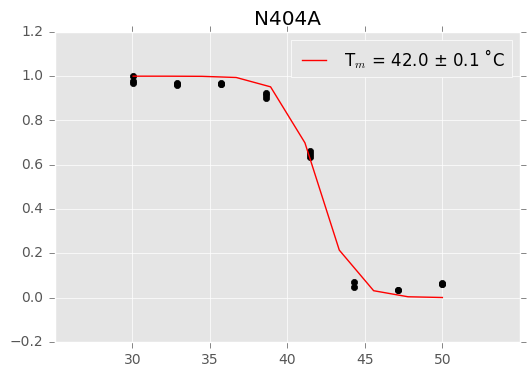

N407C


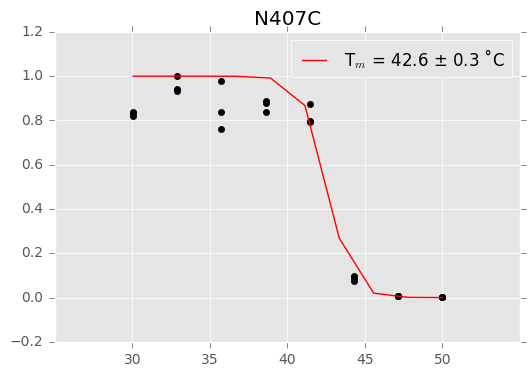

P329N


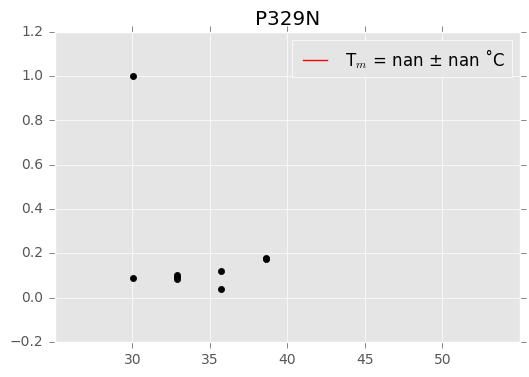

Q19A


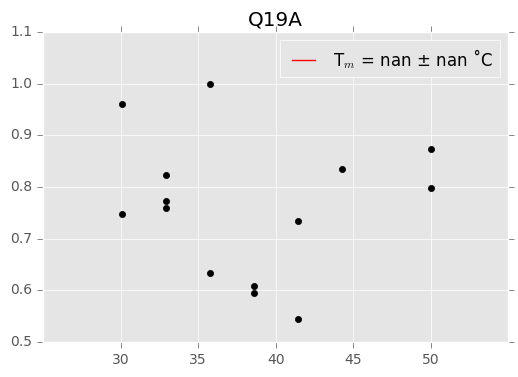

Q19C


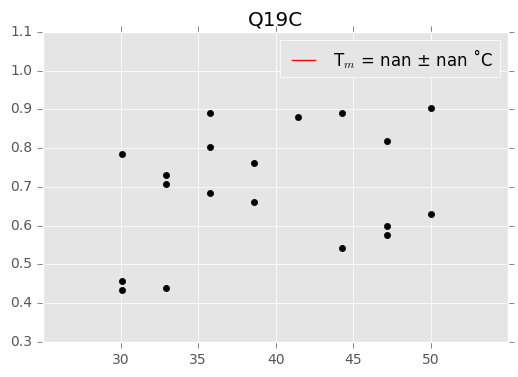

Q22S


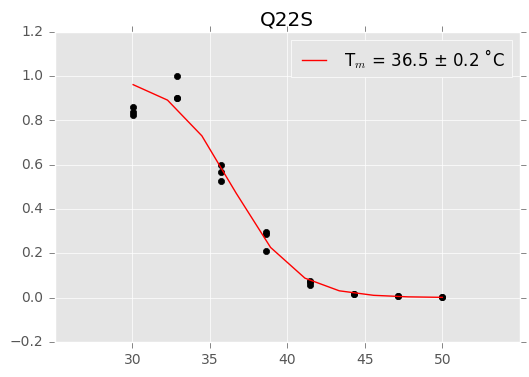

Q313R


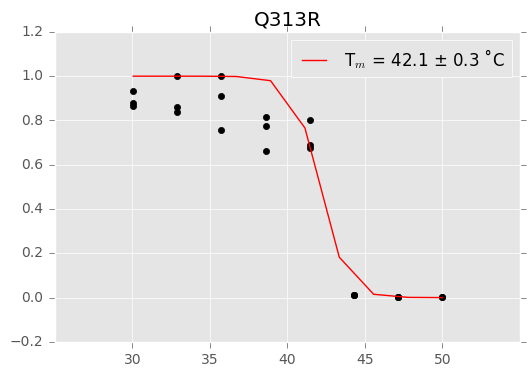

Q316R


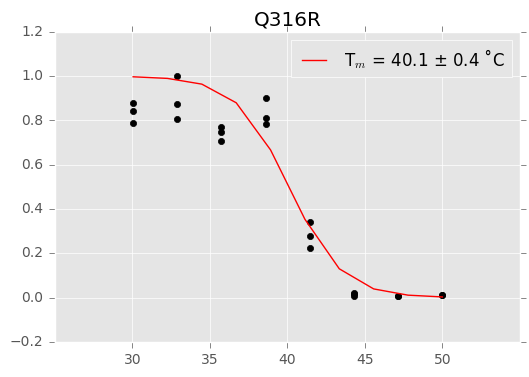

R240A


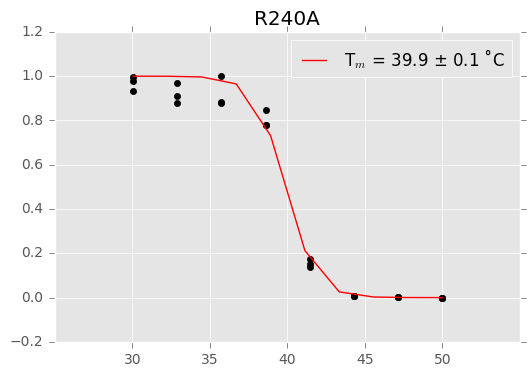

R240D


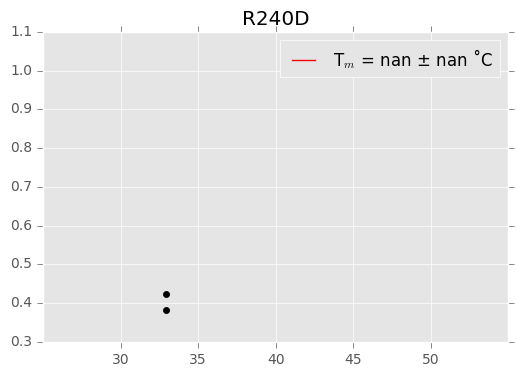

R240D_B


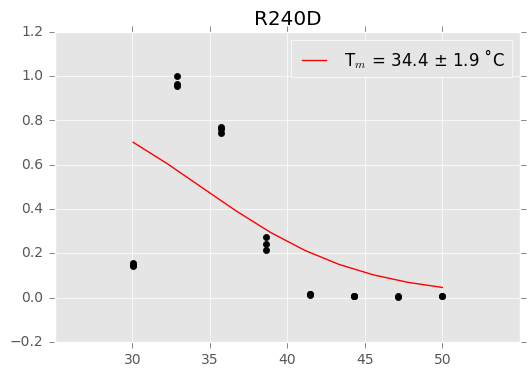

R240D_C


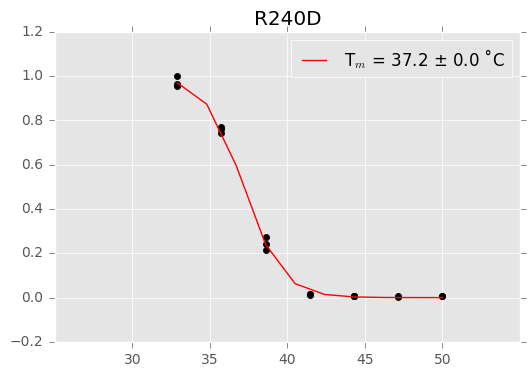

R240E


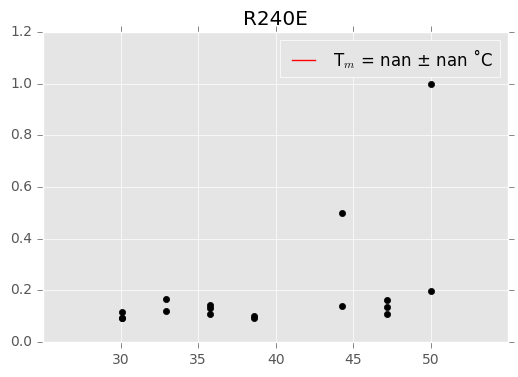

R240K


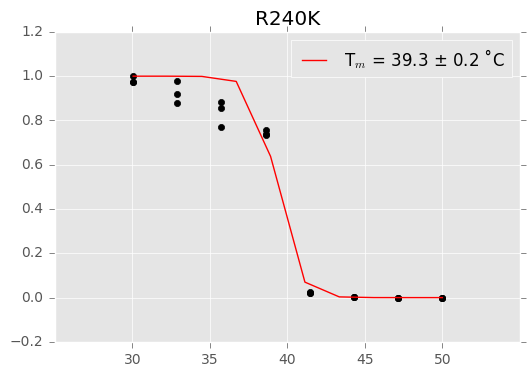

R76A


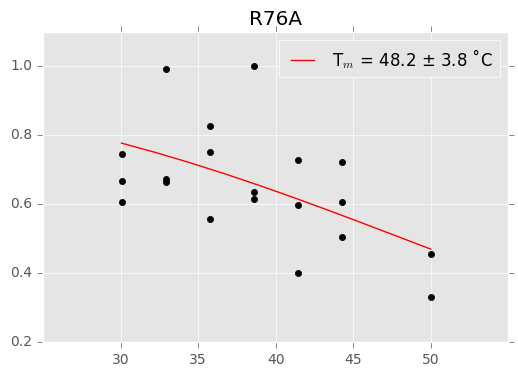

S14A


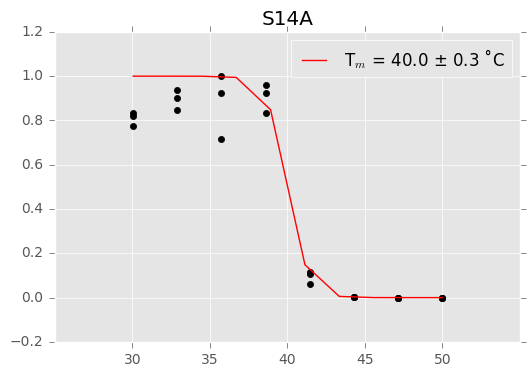

S16A


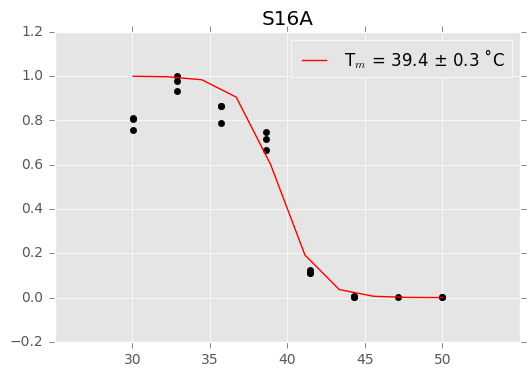

S16N


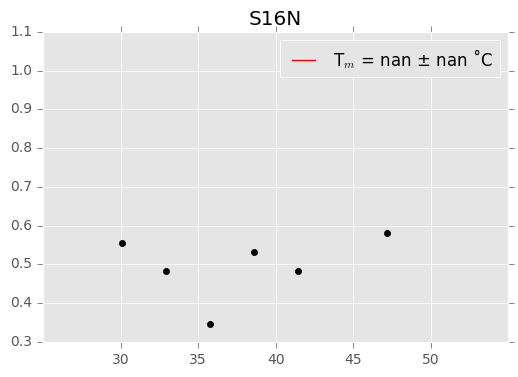

S17A


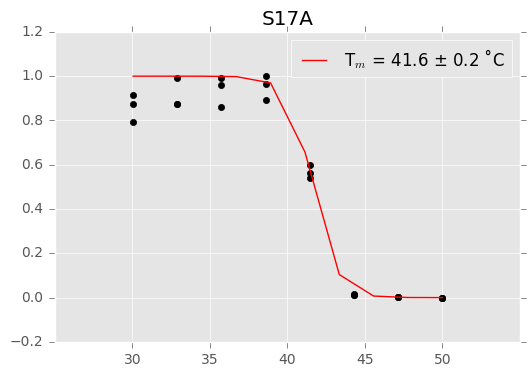

S17E


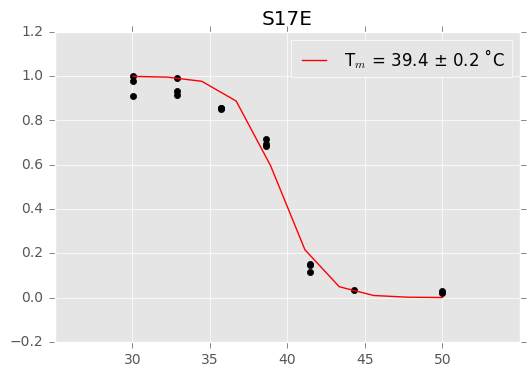

S19A


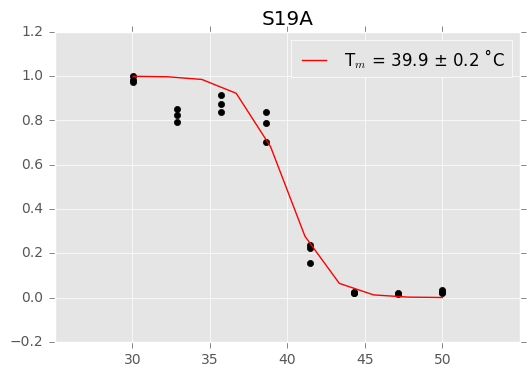

S298E


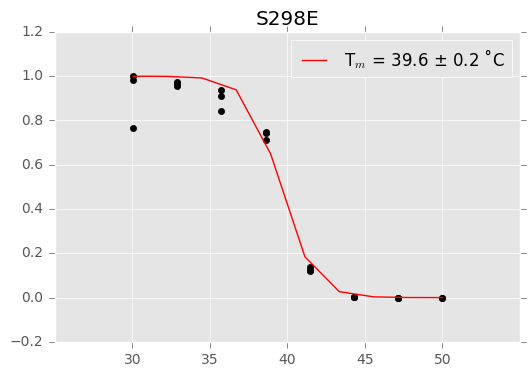

S334A


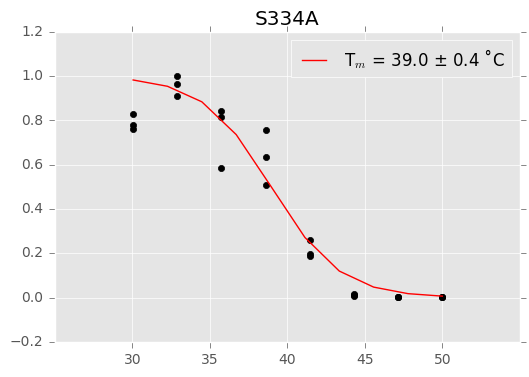

S400A


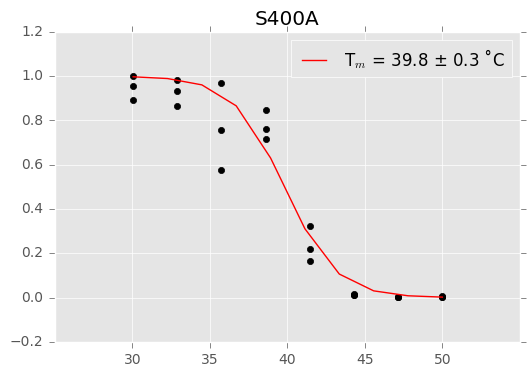

T15A


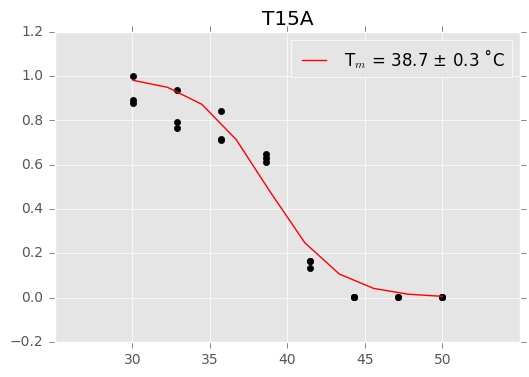

T178R


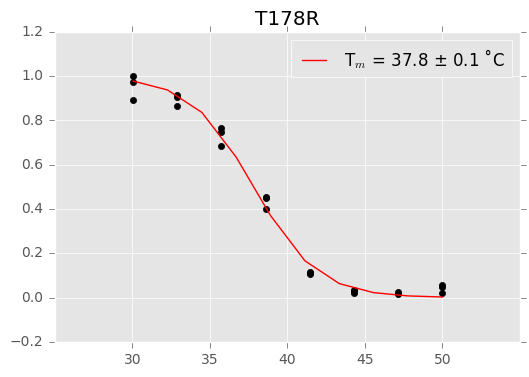

T218A


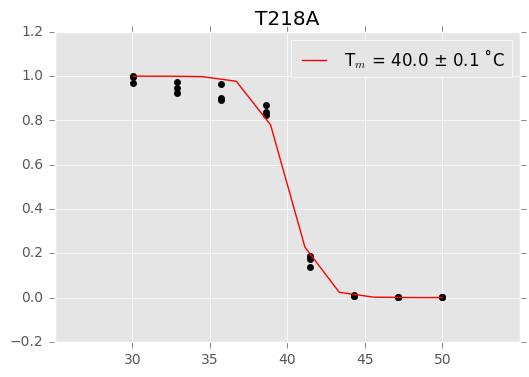

T296A


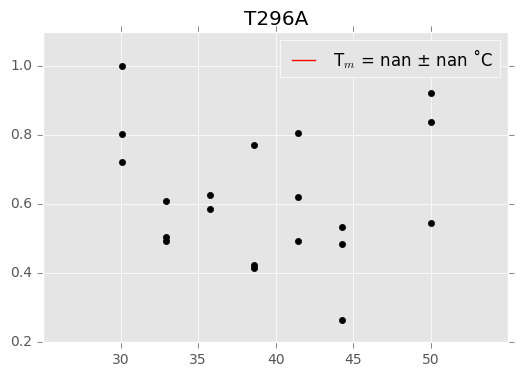

T296A_2


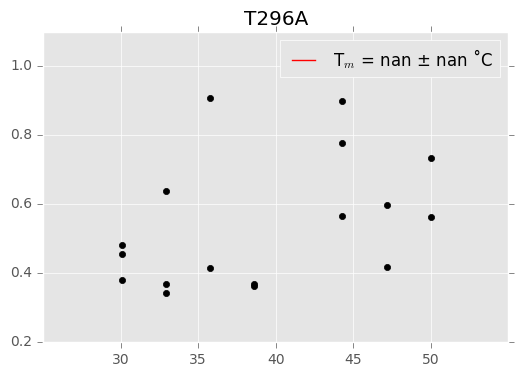

T352A


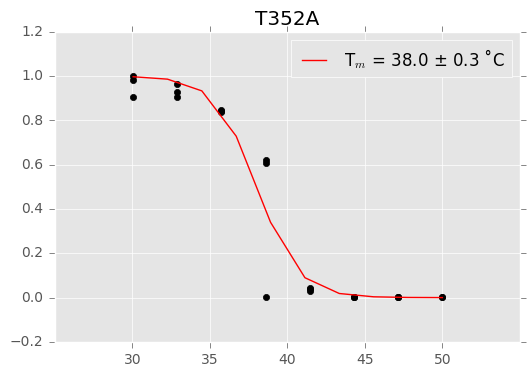

V55G


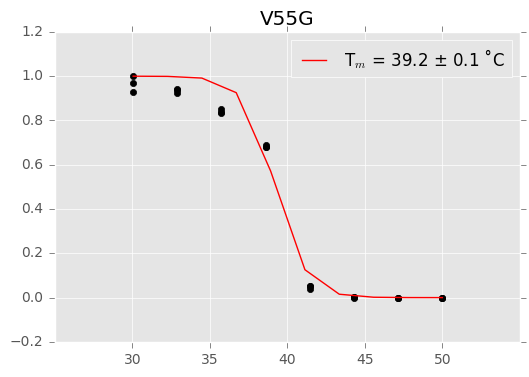

W120A


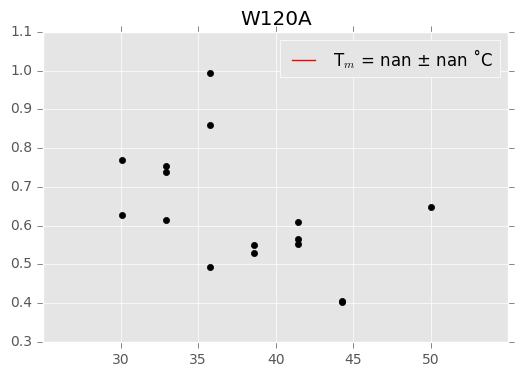

W120F


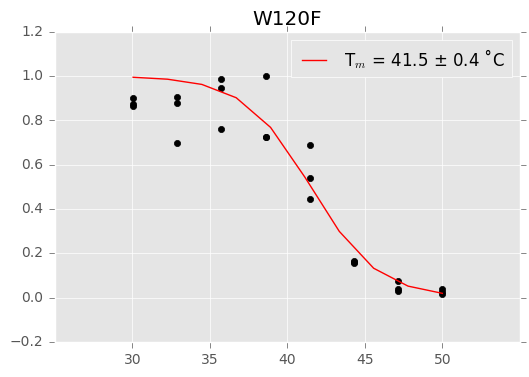

W120H


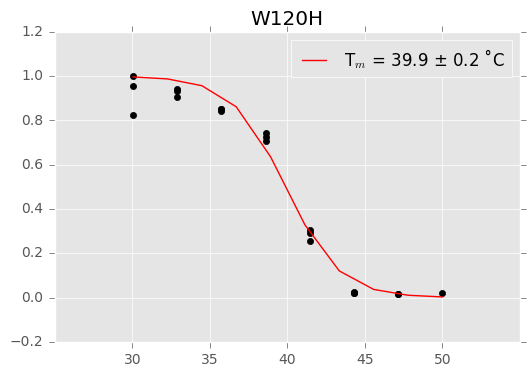

W325A


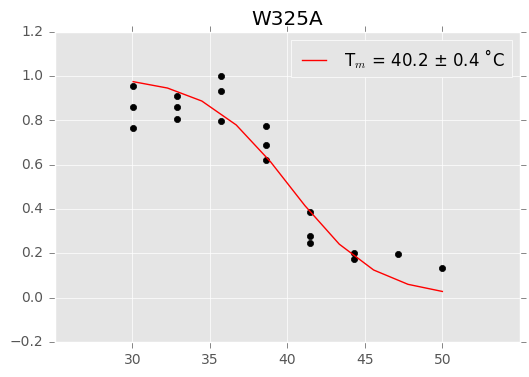

W325G


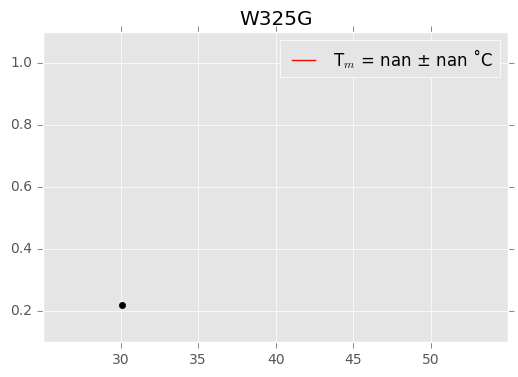

W325H


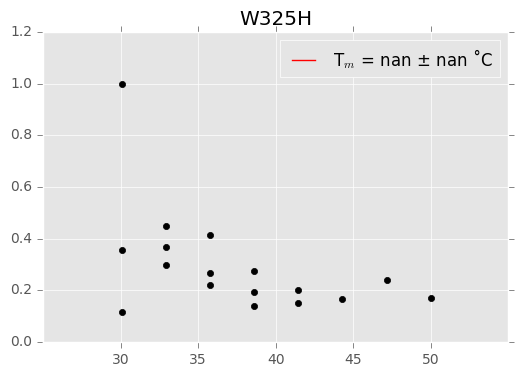

W325H_2


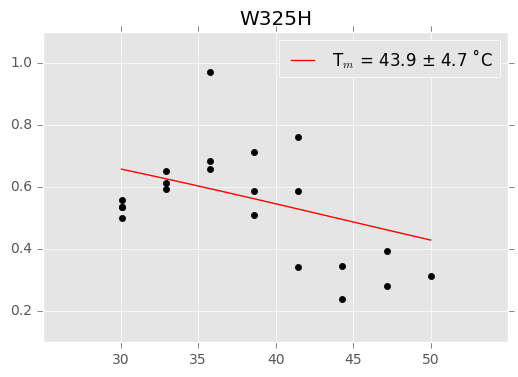

W325H_B


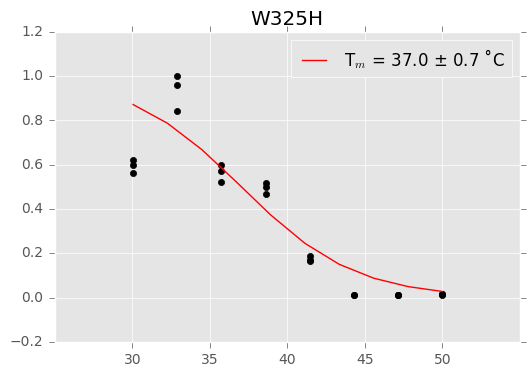

W325H_C


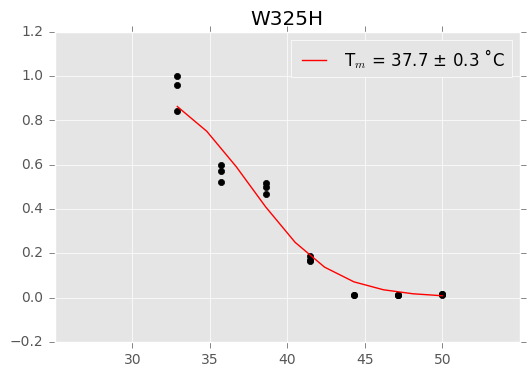

W325L


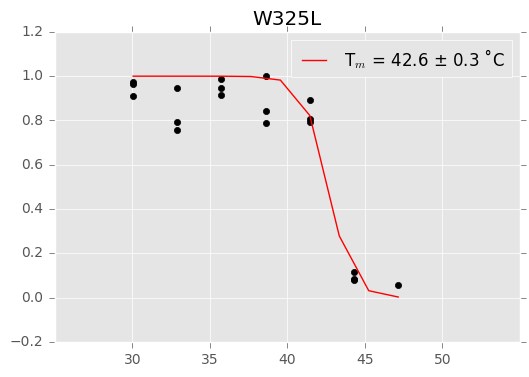

W325R


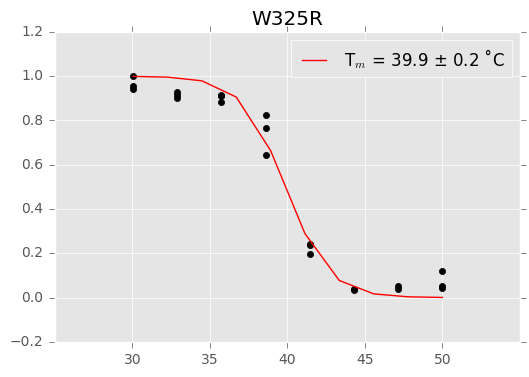

W328C


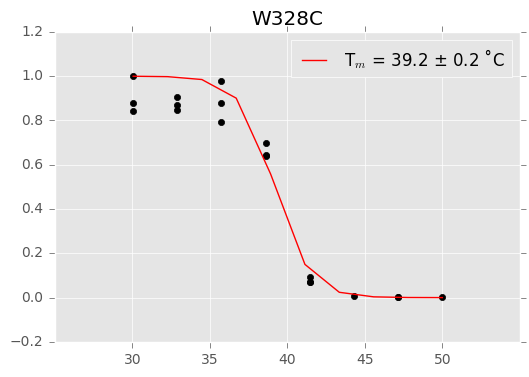

W328H


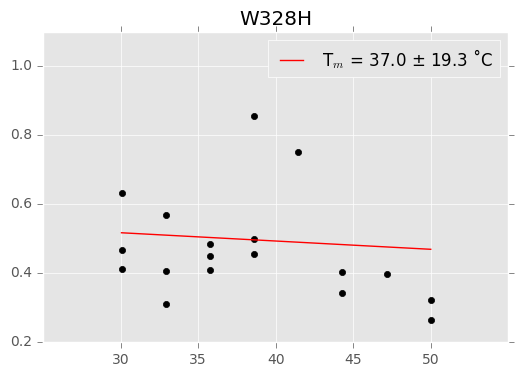

W328L


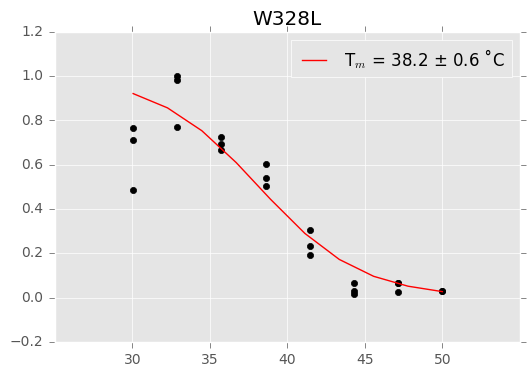

W34A


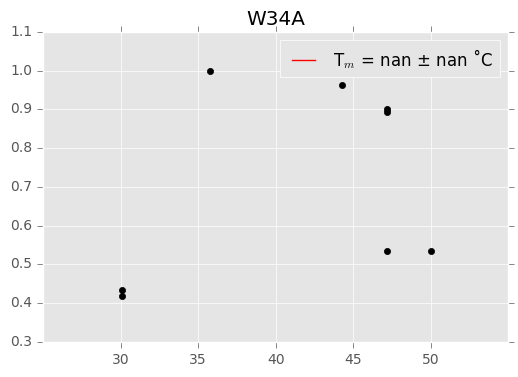

W399A


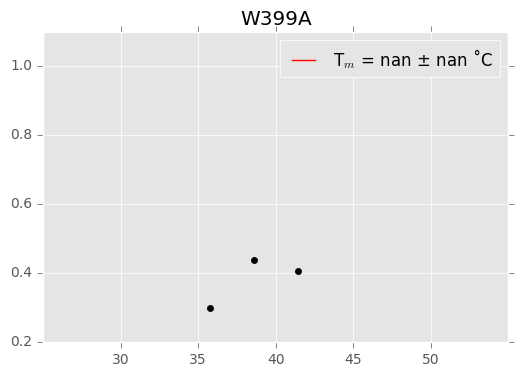

W399A_B


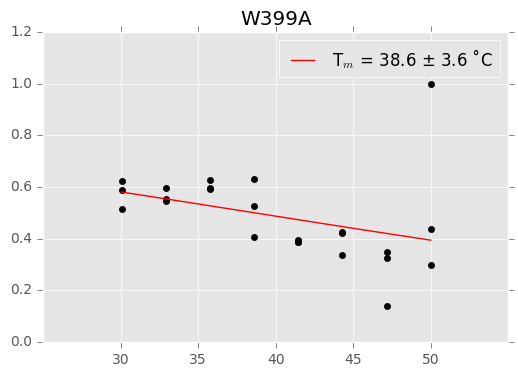

W399A_C


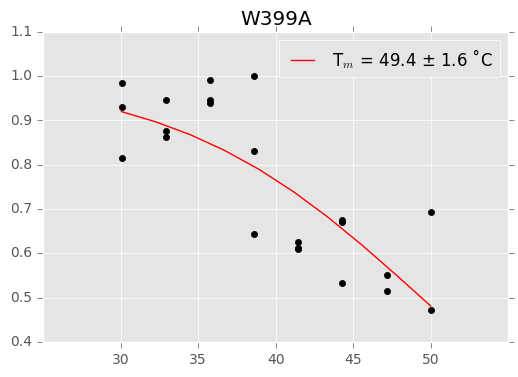

W399C


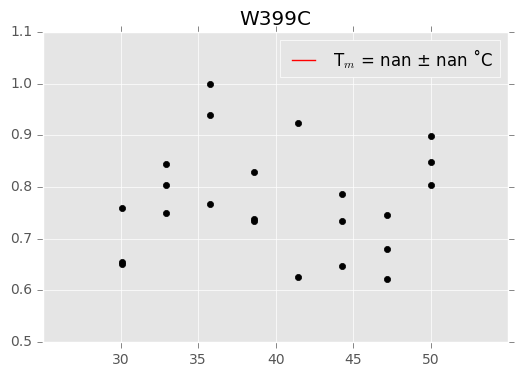

W399C_B


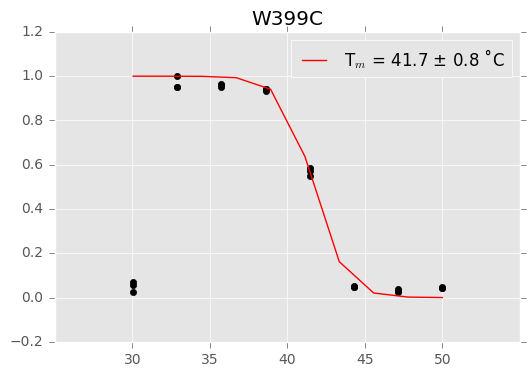

W399C_C


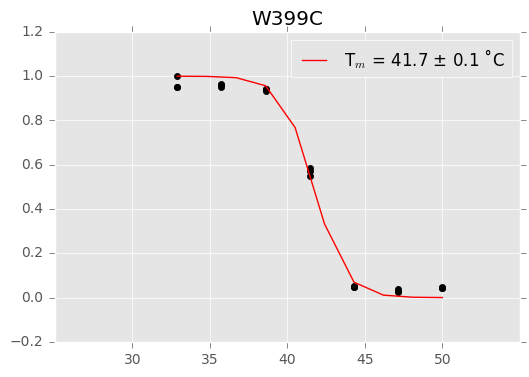

W399G


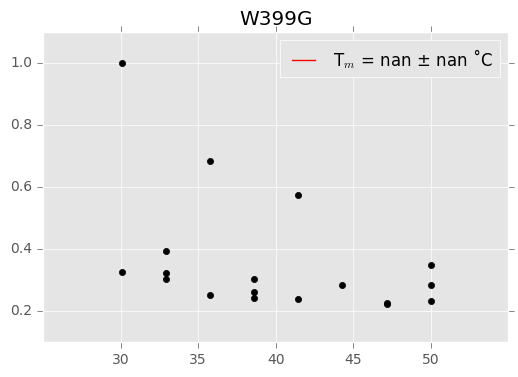

W399R


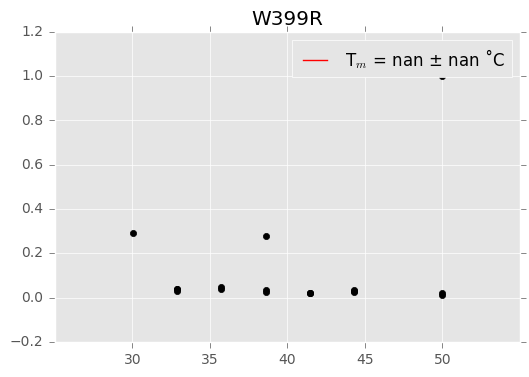

W399R_B


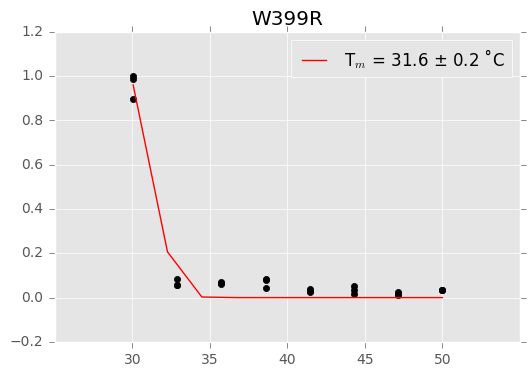

W399R_C


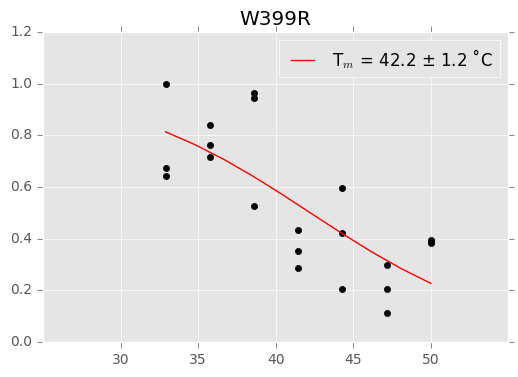

W399S


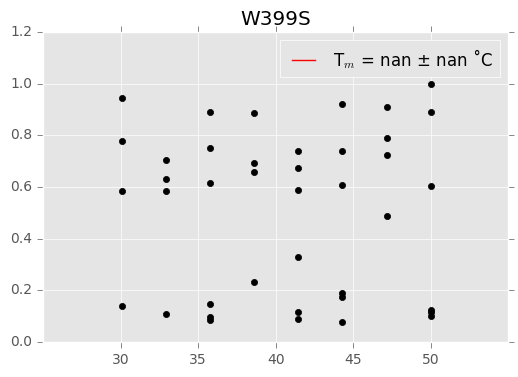

W402C


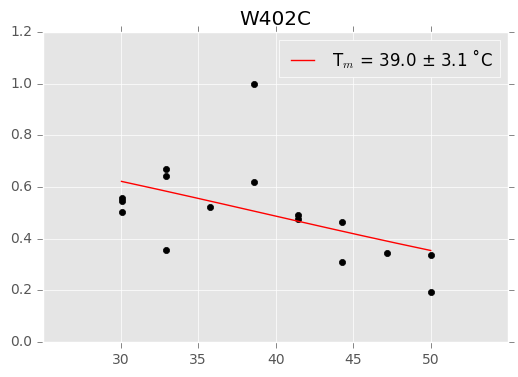

W407A


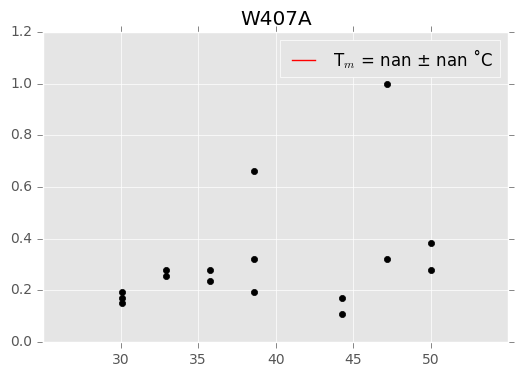

W407G


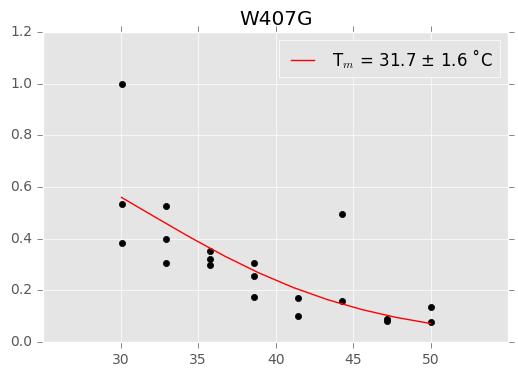

W407Q


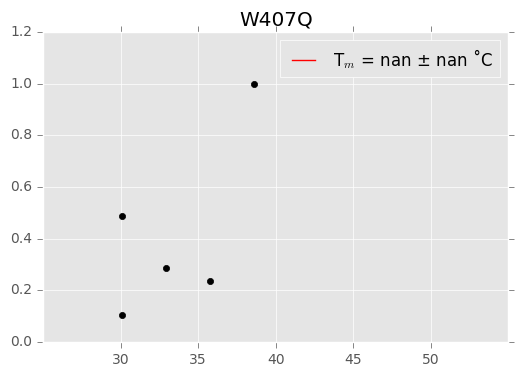

W407R


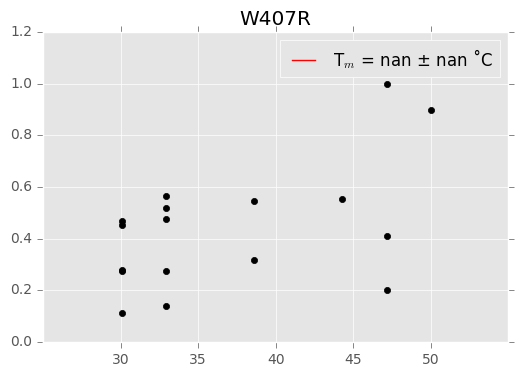

W409Y


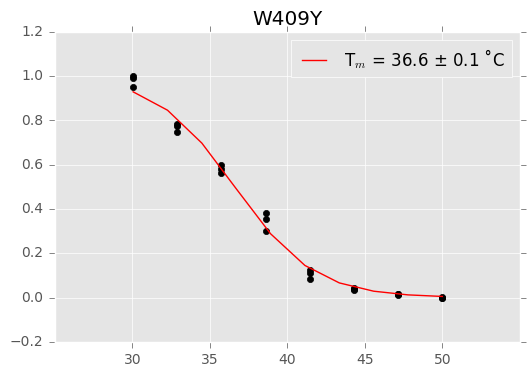

WT_Nov21


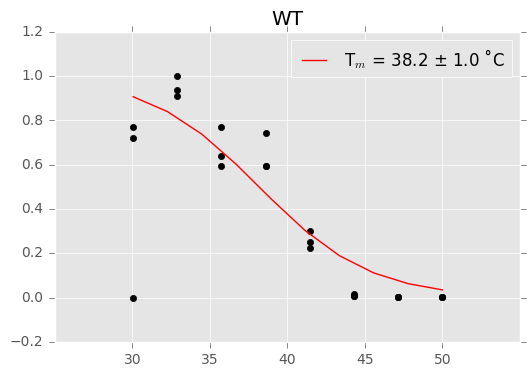

Y166P


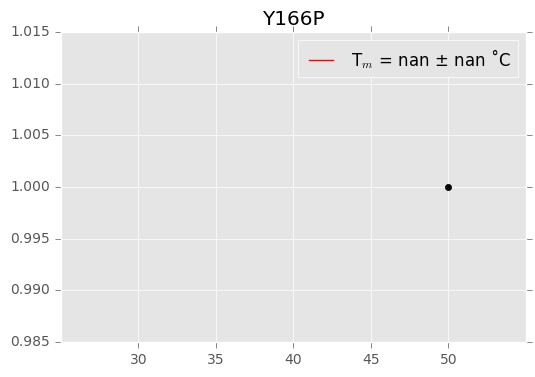

Y166P_2


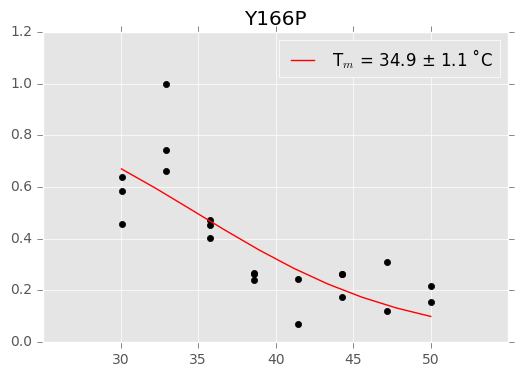

Y169P


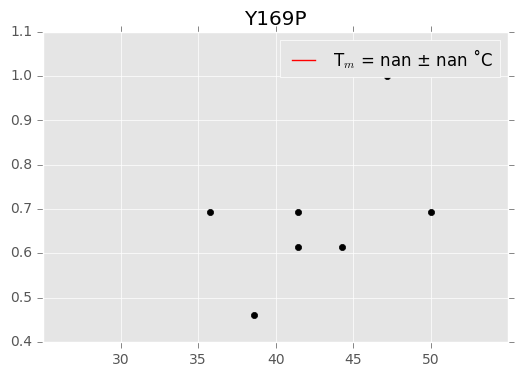

Y18A


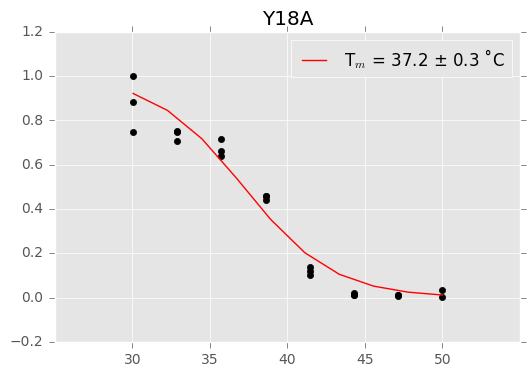

Y294A


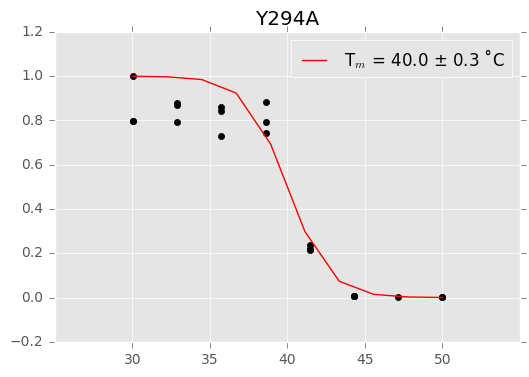

Y294F


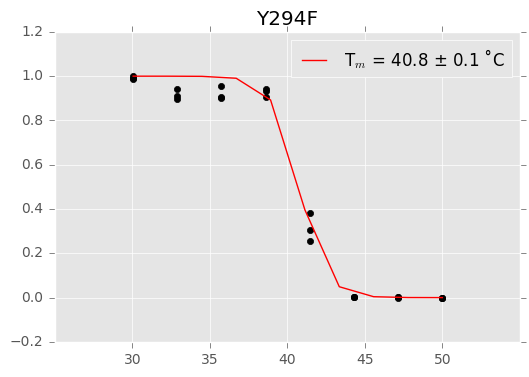

Y295A


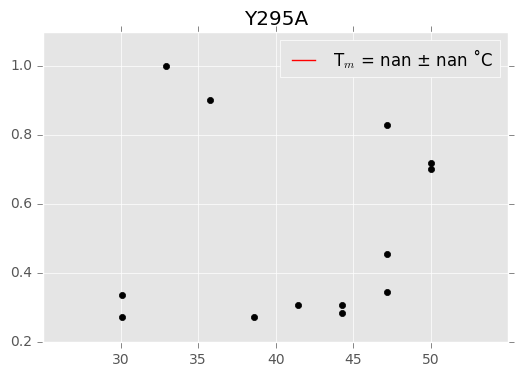

Y295G


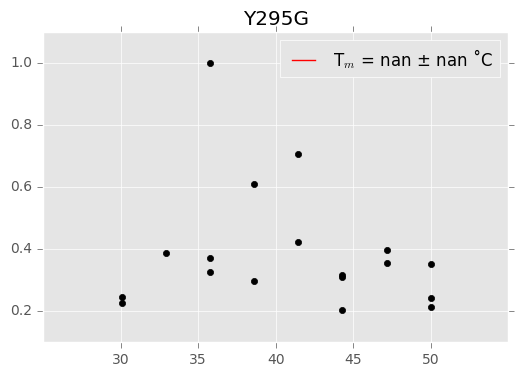

Y297F


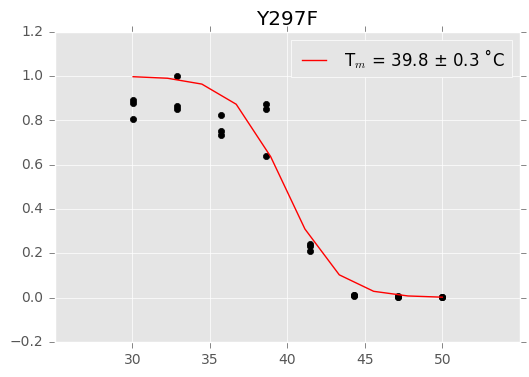

In [57]:
for idx, data in df.groupby( 'mutant' ):
    normalized_rates = data.rate / data.rate.max()
    plt.scatter( data.temp, normalized_rates, color='k' )
    x_vals = np.linspace( data.temp.min(), data.temp.max(), 10 )
    my_params = good_thermal_fits.loc[ idx ]
    plt.plot( x_vals, r( x_vals, my_params.tm, my_params.k ), color='red' )
    plt.legend( ['T$_m$ = {} ± {} ˚C'.format( my_params.tm.round(1), my_params.tm_std_err.round(1) )], loc=1 )
    plt.xlim( ( 25, 55 ) )
    plt.xticks( ( 30, 35, 40, 45, 50 ) ) 
    print( idx ) 
    #plt.title( idx ) 
    if '_' in idx:
        plt.title( idx.split( '_' )[0] )
    else:
        plt.title( idx )
    plt.show()